## Imports

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.read_excel('/content/day1_segmentation_results.xlsx')
df2 = pd.read_excel('/content/day2_segmentation_results.xlsx')
df3 = pd.read_excel('/content/day3_segmentation_results.xlsx')
df4 = pd.read_excel('/content/day4_segmentation_results.xlsx')

In [ ]:
df1.rename(columns = {'weight(gm)_day1':'weight(gm)'}, inplace = True)
df2.rename(columns = {'weight(gm)_day2':'weight(gm)'}, inplace = True)
df3.rename(columns = {'weight(gm)_day3':'weight(gm)'}, inplace = True)
df1.rename(columns = {'volume(mL)_day1':'volume(mL)'}, inplace = True)
df2.rename(columns = {'volume(mL)_day2':'volume(mL)'}, inplace = True)
df3.rename(columns = {'volume(mL)_day3':'volume(mL)'}, inplace = True)
df4.rename(columns = {'weight(gm)_day4':'weight(gm)'}, inplace = True)
df4.rename(columns = {'volume(mL)_day4':'volume(mL)'}, inplace = True)

In [ ]:
df1.head()

,name,weight(gm),volume(mL),Reading(1-16scale),angle,angle_size,angle_width,angle_height,angle_area,front,front_size,front_width,front_height,front_area,top,top_size,top_width,top_height,top_area
0,V1B_Potato1,76.35,62.500,11.0,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",601,678,328125.000,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",749,912,541237.500,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",742,888,526471.875
1,V1B_Potato2,71.36,56.250,10.0,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",502,651,260306.250,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",718,950,529621.875,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",773,923,549656.250
2,V1B_Potato3,51.63,43.750,8.0,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",521,539,223106.250,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",653,752,383146.875,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",719,729,413184.375
3,V1B_Potato4,70.03,62.500,11.0,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",613,671,316434.375,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",704,863,479456.250,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",765,870,510946.875
4,V1B_Potato5,50.12,46.875,8.5,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",468,562,212943.750,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",662,776,408900.000,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",690,756,410090.625


In [ ]:
df2.head()

,name,weight(gm),volume(mL),Reading(1-16scale),angle,angle_size,angle_width,angle_height,angle_area,front,front_size,front_width,front_height,front_area,top,top_size,top_width,top_height,top_area
0,V1B_Potato1,75.75,65.625,11.5,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",644,738,372946.875,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",767,968,588721.875,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",804,932,583218.750
1,V1B_Potato2,70.75,56.250,10.0,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",570,723,320662.500,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",667,880,467775.000,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",791,913,576421.875
2,V1B_Potato3,51.31,43.750,8.0,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",569,572,262134.375,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",666,701,376387.500,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",718,691,390412.500
3,V1B_Potato4,69.60,59.375,10.5,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",614,695,329334.375,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",679,867,464043.750,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",812,908,553312.500
4,V1B_Potato5,49.70,43.750,8.0,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",505,616,249759.375,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",631,760,384243.750,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",721,771,433631.250


In [ ]:
df3.head()

,name,weight(gm),volume(mL),Reading(1-16scale),angle,angle_size,angle_width,angle_height,angle_area,front,front_size,front_width,front_height,front_area,top,top_size,top_width,top_height,top_area
0,V1B_Potato1,75.25,59.375,11.5,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",625,718,362250.000,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",724,886,507731.250,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",785,951,589884.375
1,V1B_Potato2,70.31,56.250,11.0,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",577,747,337650.000,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",677,903,490087.500,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",776,934,565415.625
2,V1B_Potato3,51.05,37.500,8.0,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",541,565,238462.500,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",603,713,346903.125,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",727,731,418134.375
3,V1B_Potato4,69.33,56.250,11.0,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",594,708,322415.625,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",660,829,443718.750,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",770,892,555328.125
4,V1B_Potato5,49.42,34.375,7.5,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",524,618,261581.250,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",634,752,387478.125,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",722,774,432300.000


In [ ]:
df4.head()

,name,weight(gm),volume(mL),Reading(1-16scale),angle,angle_size,angle_width,angle_height,angle_area,front,front_size,front_width,front_height,front_area,top,top_size,top_width,top_height,top_area
0,V1B_Potato1,74.27,53.125,10.0,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",649,765,399590.625,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",725,895,509353.125,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",799,953,594459.375
1,V1B_Potato2,69.57,50.000,9.5,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",587,781,356831.250,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",659,893,464503.125,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",824,984,629990.625
2,V1B_Potato3,50.53,34.375,7.0,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",583,599,280059.375,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",626,696,355209.375,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",717,749,418059.375
3,V1B_Potato4,68.71,53.125,10.0,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",591,701,319668.750,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",653,821,434896.875,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",787,890,568256.250
4,V1B_Potato5,48.78,34.375,7.0,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",522,632,263990.625,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",633,762,384843.750,/home/arrafi/potato/segmentation_results/day4_...,"(4000, 3000, 3)",733,792,442425.000


In [ ]:
alldata = pd.concat([df1, df2, df3], axis=0)
alldata = alldata.sample(frac = 1)
train_df = pd.concat([df1, df2], axis=0)
train_df = train_df.sample(frac = 1)
test_df = df3.copy()

In [ ]:
train_df.head()

,name,weight(gm),volume(mL),Reading(1-16scale),angle,angle_size,angle_width,angle_height,angle_area,front,front_size,front_width,front_height,front_area,top,top_size,top_width,top_height,top_area
52,V3D_Potato9,73.11,65.625,11.5,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",528,808,342834.375,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",634,991,502368.750,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",712,1064,610865.625
39,V2C_Potato20,52.98,50.000,9.0,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",434,737,255468.750,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",501,973,396665.625,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",643,993,514612.500
5,V1B_Potato6,51.05,46.875,8.5,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",512,637,262340.625,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",594,787,376031.250,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",666,808,415228.125
17,V1B_Potato18,87.75,75.000,13.0,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",579,812,371221.875,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",656,990,510243.750,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",870,1041,735468.750
46,V3D_Potato3,74.57,59.375,10.5,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",571,743,324028.125,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",702,930,493443.750,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",866,1076,709509.375


In [ ]:
test_df.head()

,name,weight(gm),volume(mL),Reading(1-16scale),angle,angle_size,angle_width,angle_height,angle_area,front,front_size,front_width,front_height,front_area,top,top_size,top_width,top_height,top_area
0,V1B_Potato1,75.25,59.375,11.5,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",625,718,362250.000,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",724,886,507731.250,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",785,951,589884.375
1,V1B_Potato2,70.31,56.250,11.0,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",577,747,337650.000,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",677,903,490087.500,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",776,934,565415.625
2,V1B_Potato3,51.05,37.500,8.0,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",541,565,238462.500,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",603,713,346903.125,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",727,731,418134.375
3,V1B_Potato4,69.33,56.250,11.0,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",594,708,322415.625,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",660,829,443718.750,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",770,892,555328.125
4,V1B_Potato5,49.42,34.375,7.5,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",524,618,261581.250,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",634,752,387478.125,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",722,774,432300.000


In [ ]:
alldata.head(10)

,name,weight(gm),volume(mL),Reading(1-16scale),angle,angle_size,angle_width,angle_height,angle_area,front,front_size,front_width,front_height,front_area,top,top_size,top_width,top_height,top_area
0,V1B_Potato1,75.75,65.625,11.5,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",644,738,372946.875,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",767,968,588721.875,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",804,932,583218.750
47,V3D_Potato4,59.49,46.875,9.5,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",476,776,298106.250,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",577,943,440493.750,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",650,1032,553078.125
42,V2C_Potato23,58.58,53.125,9.5,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",500,725,296475.000,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",563,929,428315.625,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",726,1029,591637.500
14,V1B_Potato15,57.88,50.000,9.0,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",513,557,227503.125,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",674,787,408187.500,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",696,781,416053.125
52,V3D_Potato9,73.11,65.625,11.5,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",528,808,342834.375,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",634,991,502368.750,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",712,1064,610865.625
5,V1B_Potato6,50.95,37.500,8.0,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",514,630,254793.750,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",609,803,388462.500,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",650,814,416990.625
32,V2C_Potato13,54.37,46.875,8.5,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",482,705,284906.250,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",547,875,390403.125,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",670,922,504121.875
49,V3D_Potato6,60.33,53.125,9.5,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",522,665,266746.875,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",654,811,404025.000,/home/arrafi/potato/segmentation_results/day2_...,"(4000, 3000, 3)",754,916,533165.625
26,V2C_Potato7,52.93,37.500,8.0,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",458,731,261225.000,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",540,893,369759.375,/home/arrafi/potato/segmentation_results/day3_...,"(4000, 3000, 3)",696,998,528403.125
30,V2C_Potato11,68.32,65.625,11.5,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",535,698,292218.750,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",657,906,484593.750,/home/arrafi/potato/segmentation_results/day1_...,"(4000, 3000, 3)",794,966,609918.750


In [ ]:
alldata.columns

Index(['name', 'weight(gm)', 'volume(mL)', 'Reading(1-16scale)', 'angle',
       'angle_size', 'angle_width', 'angle_height', 'angle_area', 'front',
       'front_size', 'front_width', 'front_height', 'front_area', 'top',
       'top_size', 'top_width', 'top_height', 'top_area'],
      dtype='object')

In [ ]:
dropcols = ['Reading(1-16scale)', 'angle', 'angle_size',
            'front', 'front_size', 'top', 'top_size']
xcolumns = ['angle_width', 'angle_height', 'angle_area',
            'front_width', 'front_height', 'front_area',
            'top_width', 'top_height', 'top_area']
ycolumns = ['weight(gm)', 'volume(mL)']

## Data Distribution

In [ ]:
def extractSpecies(row):
  return row[:3]

alldata = alldata.drop(dropcols, axis=1)

alldata['species'] = alldata['name'].apply(extractSpecies)
alldata.head()


,name,weight(gm),volume(mL),angle_width,angle_height,angle_area,front_width,front_height,front_area,top_width,top_height,top_area,species
0,V1B_Potato1,75.75,65.625,644,738,372946.875,767,968,588721.875,804,932,583218.750,V1B
47,V3D_Potato4,59.49,46.875,476,776,298106.250,577,943,440493.750,650,1032,553078.125,V3D
42,V2C_Potato23,58.58,53.125,500,725,296475.000,563,929,428315.625,726,1029,591637.500,V2C
14,V1B_Potato15,57.88,50.000,513,557,227503.125,674,787,408187.500,696,781,416053.125,V1B
52,V3D_Potato9,73.11,65.625,528,808,342834.375,634,991,502368.750,712,1064,610865.625,V3D


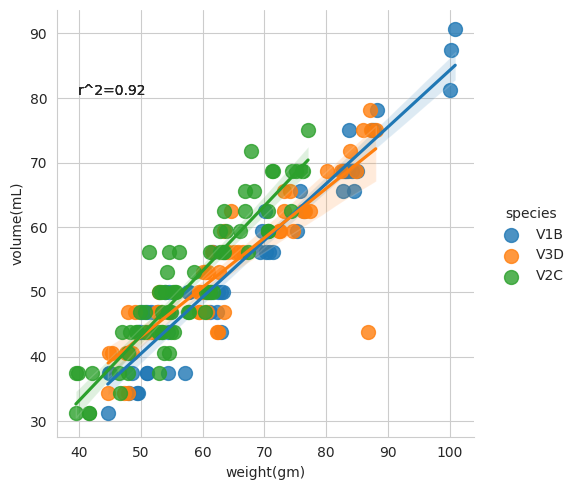

In [ ]:
import scipy as sp

sns.set_style('whitegrid')
g = sns.lmplot(x ='weight(gm)', y ='volume(mL)', data = alldata, hue ='species',
           scatter_kws ={'s':100},
           )

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(alldata['weight(gm)'], alldata['volume(mL)'])
    ax = plt.gca()
    ax.text(.05, .8, 'r^2={:.2f}'.format(r),
        transform=ax.transAxes)
    # ax.text(.05, .8, 'r^2={:.2f}, p={:.2g}'.format(r, p),
    #         transform=ax.transAxes)

g.map_dataframe(annotate)
plt.show()

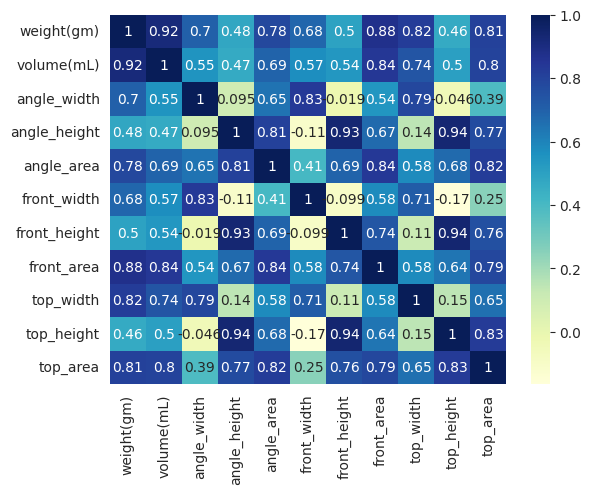

In [ ]:
dataplot = sns.heatmap(alldata.corr(), cmap="YlGnBu", annot=True)

In [ ]:
corr_matrix = alldata.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
for threshold in np.arange(.75, 1., .05):
    to_drop = [column for column in upper.columns if any(upper[column] >= threshold)]
    print('features with above {:.2f} correlations {}'.format(threshold*100, to_drop))
    # print(to_drop)

features with above 75.00 correlations ['volume(mL)', 'angle_area', 'front_width', 'front_height', 'front_area', 'top_width', 'top_height', 'top_area']
features with above 80.00 correlations ['volume(mL)', 'angle_area', 'front_width', 'front_height', 'front_area', 'top_width', 'top_height', 'top_area']
features with above 85.00 correlations ['volume(mL)', 'front_height', 'front_area', 'top_height']
features with above 90.00 correlations ['volume(mL)', 'front_height', 'top_height']
features with above 95.00 correlations []


## predictions

### Weight

##### all data in shuffle

In [ ]:
result_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
y_cols = ycolumns

from itertools import combinations
lis = xcolumns.copy()
print(lis)
for ycol in y_cols[:1]:
  for i in range(len(lis)):
    temp_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
    for l in list(combinations(lis, i)):
      if len(l)>0:
        X_train, X_test, y_train, y_test = train_test_split(alldata[list(l)], alldata[ycol], test_size = 0.33, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        result_df.loc[len(result_df)] = [list(l), ycol, np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred)*100]
result_df = result_df.sort_values('ACCURACY', ascending=False)
result_df.head()

['angle_width', 'angle_height', 'angle_area', 'front_width', 'front_height', 'front_area', 'top_width', 'top_height', 'top_area']


,predictor variables,target variable,MAE,R^2,RMSE,ACCURACY
503,"[angle_width, angle_height, angle_area, front_...",weight(gm),3.552945,0.929163,2.838346,92.916334
488,"[angle_width, angle_area, front_width, front_h...",weight(gm),3.554684,0.929094,2.835366,92.909397
508,"[angle_width, angle_area, front_width, front_h...",weight(gm),3.556985,0.929002,2.854079,92.900217
477,"[angle_width, angle_height, angle_area, front_...",weight(gm),3.558556,0.928939,2.817313,92.893942
482,"[angle_width, angle_height, front_width, front...",weight(gm),3.558848,0.928928,2.851719,92.892776


##### Unseen data: day3

In [ ]:
result_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
y_cols = ycolumns

from itertools import combinations
lis = xcolumns.copy()
print(lis)
for ycol in y_cols[:1]:
  for i in range(len(lis)):
    temp_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
    for l in list(combinations(lis, i)):
      if len(l)>0:
        X_train, X_test, y_train, y_test = train_df[list(l)], test_df[list(l)], train_df[ycol], test_df[ycol]
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        result_df.loc[len(result_df)] = [list(l), ycol, np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred)*100]
result_df = result_df.sort_values('ACCURACY', ascending=False)
result_df.head()

['angle_width', 'angle_height', 'angle_area', 'front_width', 'front_height', 'front_area', 'top_width', 'top_height', 'top_area']


,predictor variables,target variable,MAE,R^2,RMSE,ACCURACY
464,"[front_width, front_height, front_area, top_wi...",weight(gm),3.565845,0.922869,2.753170,92.286874
379,"[front_width, front_area, top_width, top_heigh...",weight(gm),3.566777,0.922828,2.741555,92.282841
254,"[front_area, top_width, top_height, top_area]",weight(gm),3.576511,0.922407,2.758525,92.240666
377,"[front_width, front_height, front_area, top_he...",weight(gm),3.579955,0.922257,2.756785,92.225712
380,"[front_height, front_area, top_width, top_heig...",weight(gm),3.586214,0.921985,2.773728,92.198506


### Volume

#### all data in shuffle

In [ ]:
result_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
y_cols = ycolumns

from itertools import combinations
lis = xcolumns.copy()
print(lis)
for ycol in y_cols[1:]:
  for i in range(len(lis)):
    temp_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
    for l in list(combinations(lis, i)):
      if len(l)>0:
        X_train, X_test, y_train, y_test = train_test_split(alldata[list(l)], alldata[ycol], test_size = 0.33, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        result_df.loc[len(result_df)] = [list(l), ycol, np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred)*100]
result_df.sort_values('ACCURACY', ascending=False).head()

['angle_width', 'angle_height', 'angle_area', 'front_width', 'front_height', 'front_area', 'top_width', 'top_height', 'top_area']


,predictor variables,target variable,MAE,R^2,RMSE,ACCURACY
183,"[angle_width, front_area, top_height, top_area]",volume(mL),4.715641,0.856329,3.673792,85.632882
433,"[angle_width, front_width, front_height, front...",volume(mL),4.720327,0.856043,3.666449,85.604315
318,"[angle_width, front_width, front_area, top_hei...",volume(mL),4.724311,0.855800,3.668727,85.580005
322,"[angle_width, front_height, front_area, top_he...",volume(mL),4.727507,0.855605,3.676955,85.560492
324,"[angle_width, front_area, top_width, top_heigh...",volume(mL),4.741412,0.854754,3.694630,85.475425


##### adding weight too

In [ ]:
result_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
y_cols = ycolumns

from itertools import combinations
lis = xcolumns.copy()
lis.append(ycolumns[0])
print(lis)
for ycol in y_cols[1:]:
  for i in range(len(lis)):
    temp_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
    for l in list(combinations(lis, i)):
      if len(l)>0:
        X_train, X_test, y_train, y_test = train_test_split(alldata[list(l)], alldata[ycol], test_size = 0.33, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        result_df.loc[len(result_df)] = [list(l), ycol, np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred)*100]
result_df.sort_values('ACCURACY', ascending=False).head()

['angle_width', 'angle_height', 'angle_area', 'front_width', 'front_height', 'front_area', 'top_width', 'top_height', 'top_area', 'weight(gm)']


,predictor variables,target variable,MAE,R^2,RMSE,ACCURACY
838,"[angle_area, front_height, top_width, top_heig...",volume(mL),3.936817,0.899867,3.156108,89.986668
928,"[angle_width, front_width, front_height, top_w...",volume(mL),3.962520,0.898555,3.001106,89.855494
963,"[angle_area, front_width, front_height, top_wi...",volume(mL),3.983827,0.897461,3.031244,89.746099
761,"[angle_width, front_height, top_width, top_hei...",volume(mL),3.984898,0.897406,3.196197,89.740586
610,"[angle_area, front_height, top_height, top_are...",volume(mL),3.999413,0.896657,3.225695,89.665710


#### Unseen data: day3

In [ ]:
result_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
y_cols = ycolumns

from itertools import combinations
lis = xcolumns.copy()
print(lis)
for ycol in y_cols[1:]:
  for i in range(len(lis)):
    temp_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
    for l in list(combinations(lis, i)):
      if len(l)>0:
        X_train, X_test, y_train, y_test = train_df[list(l)], test_df[list(l)], train_df[ycol], test_df[ycol]
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        result_df.loc[len(result_df)] = [list(l), ycol, np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred)*100]
result_df.sort_values('ACCURACY', ascending=False).head()

['angle_width', 'angle_height', 'angle_area', 'front_width', 'front_height', 'front_area', 'top_width', 'top_height', 'top_area']


,predictor variables,target variable,MAE,R^2,RMSE,ACCURACY
90,"[angle_height, front_area, top_area]",volume(mL),6.206332,0.732231,4.842770,73.223082
206,"[angle_height, front_width, front_area, top_area]",volume(mL),6.261224,0.727473,4.879777,72.747333
403,"[angle_width, angle_height, front_width, front...",volume(mL),6.262350,0.727375,4.836365,72.737526
276,"[angle_width, angle_height, front_width, front...",volume(mL),6.265930,0.727063,4.841796,72.706346
347,"[angle_height, front_width, front_height, fron...",volume(mL),6.268481,0.726841,4.889498,72.684122


##### adding weight too

In [ ]:
result_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
y_cols = ycolumns

from itertools import combinations
lis = xcolumns.copy()
lis.append(ycolumns[0])
print(lis)
for ycol in y_cols[1:]:
  for i in range(len(lis)):
    temp_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
    for l in list(combinations(lis, i)):
      if len(l)>0:
        X_train, X_test, y_train, y_test = train_df[list(l)], test_df[list(l)], train_df[ycol], test_df[ycol]
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        result_df.loc[len(result_df)] = [list(l), ycol, np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred)*100]
result_df.sort_values('ACCURACY', ascending=False).head()

['angle_width', 'angle_height', 'angle_area', 'front_width', 'front_height', 'front_area', 'top_width', 'top_height', 'top_area', 'weight(gm)']


,predictor variables,target variable,MAE,R^2,RMSE,ACCURACY
111,"[angle_height, front_area, top_area]",volume(mL),6.206332,0.732231,4.842770,73.223082
287,"[angle_height, front_width, front_area, top_area]",volume(mL),6.261224,0.727473,4.879777,72.747333
674,"[angle_width, angle_height, front_width, front...",volume(mL),6.262350,0.727375,4.836365,72.737526
413,"[angle_width, angle_height, front_width, front...",volume(mL),6.265930,0.727063,4.841796,72.706346
548,"[angle_height, front_width, front_height, fron...",volume(mL),6.268481,0.726841,4.889498,72.684122


### predict volume from weight

#### all data in shuffle

In [ ]:
result_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
X_train, X_test, y_train, y_test = train_test_split(alldata[ycolumns[0]], alldata[ycolumns[1]], test_size = 0.33, random_state=42)
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train)
y_pred = model.predict(X_test.values.reshape(-1,1))
result_df.loc[len(result_df)] = [ycolumns[0], ycolumns[1], np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred)*100]
result_df

,predictor variables,target variable,MAE,R^2,RMSE,ACCURACY
0,weight(gm),volume(mL),4.570783,0.86502,3.594228,86.502006


#### Unseen data: day3

In [ ]:
result_df = pd.DataFrame(columns = ['predictor variables', 'target variable', 'MAE', 'R^2', 'RMSE', 'ACCURACY'])
X_train, y_train = train_df[ycolumns[0]], train_df[ycolumns[1]]
X_test, y_test = test_df[ycolumns[0]], test_df[ycolumns[1]]
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train)
y_pred = model.predict(X_test.values.reshape(-1,1))
result_df.loc[len(result_df)] = [ycolumns[0], ycolumns[1], np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred)*100]
result_df

,predictor variables,target variable,MAE,R^2,RMSE,ACCURACY
0,weight(gm),volume(mL),7.237474,0.635863,5.662756,63.586317


### predict volume from predicted weight

#### All data in shuffle

In [ ]:
wX_train, wX_test, wy_train, wy_test = train_test_split(alldata[['angle_width','angle_area','front_area','top_height','top_area']],
                                                    alldata['weight(gm)'], test_size = 0.33, random_state=42)
weight_model = LinearRegression()
weight_model.fit(wX_train, wy_train)
wy_pred = weight_model.predict(wX_test)
print("weight_model accuracy", r2_score(wy_test, wy_pred)*100)

vX_train, vX_test, vy_train, vy_test = train_test_split(alldata[[ycolumns[0]]],
                                                    alldata[ycolumns[1]], test_size = 0.33, random_state=42)
volume_model = LinearRegression()
volume_model.fit(vX_train, vy_train)
vy_pred = volume_model.predict(vX_test)
print("volume_model accuracy", r2_score(vy_test, vy_pred)*100)

v2w_pred = volume_model.predict(wy_pred.reshape(-1, 1))
print("volume prediction from predicted weight accuracy:", r2_score(vy_test, v2w_pred)*100)

weight_model accuracy 92.79037081712869
volume_model accuracy 86.50200646608613
volume prediction from predicted weight accuracy: 82.95563432554665


#### Unseen data: day3

In [ ]:
wX_train, wy_train = train_df[['front_width','front_height','front_area','top_width','top_height','top_area']], train_df['weight(gm)']
wX_test, wy_test = test_df[['front_width','front_height','front_area','top_width','top_height','top_area']], test_df['weight(gm)']

weight_model = LinearRegression()
weight_model.fit(wX_train, wy_train)
wy_pred = weight_model.predict(wX_test)
print("weight_model accuracy", r2_score(wy_test, wy_pred)*100)

vX_train, vy_train = train_df[ycolumns[0]], train_df[ycolumns[1]]
vX_test, vy_test = test_df[ycolumns[0]], test_df[ycolumns[1]]

volume_model = LinearRegression()
volume_model.fit(vX_train.values.reshape(-1, 1), vy_train)
vy_pred = volume_model.predict(vX_test.values.reshape(-1, 1))
print("volume_model accuracy", r2_score(vy_test, vy_pred)*100)

v2w_pred = volume_model.predict(wy_pred.reshape(-1, 1))
print("volume prediction from predicted weight accuracy:", r2_score(vy_test, v2w_pred)*100)

weight_model accuracy 92.28687406756426
volume_model accuracy 63.586316758399654
volume prediction from predicted weight accuracy: 66.37869749276975


## Change plots

In [ ]:
df1 = pd.read_excel('/content/day1_segmentation_results.xlsx')
df2 = pd.read_excel('/content/day2_segmentation_results.xlsx')
df3 = pd.read_excel('/content/day3_segmentation_results.xlsx')
df4 = pd.read_excel('/content/day4_segmentation_results.xlsx')

In [ ]:
data1 = pd.merge(df1, df2, 'outer', on = ['name'])
data2 = pd.merge(df3, df4, 'outer', on = ['name'])
data = pd.merge(data1, data2, 'outer', on = ['name'])
df = data[['name', 'weight(gm)_day1', 'weight(gm)_day2', 'weight(gm)_day3', 'weight(gm)_day4', 'volume(mL)_day1', 'volume(mL)_day2', 'volume(mL)_day3', 'volume(mL)_day4']]
def changeName(row):
    row['species'] = row['name'][:3]
    return row
df = df.apply(changeName, axis=1)
df.head()

,name,weight(gm)_day1,weight(gm)_day2,weight(gm)_day3,weight(gm)_day4,volume(mL)_day1,volume(mL)_day2,volume(mL)_day3,volume(mL)_day4,species
0,V1B_Potato1,76.35,75.75,75.25,74.27,62.500,65.625,59.375,53.125,V1B
1,V1B_Potato2,71.36,70.75,70.31,69.57,56.250,56.250,56.250,50.000,V1B
2,V1B_Potato3,51.63,51.31,51.05,50.53,43.750,43.750,37.500,34.375,V1B
3,V1B_Potato4,70.03,69.60,69.33,68.71,62.500,59.375,56.250,53.125,V1B
4,V1B_Potato5,50.12,49.70,49.42,48.78,46.875,43.750,34.375,34.375,V1B


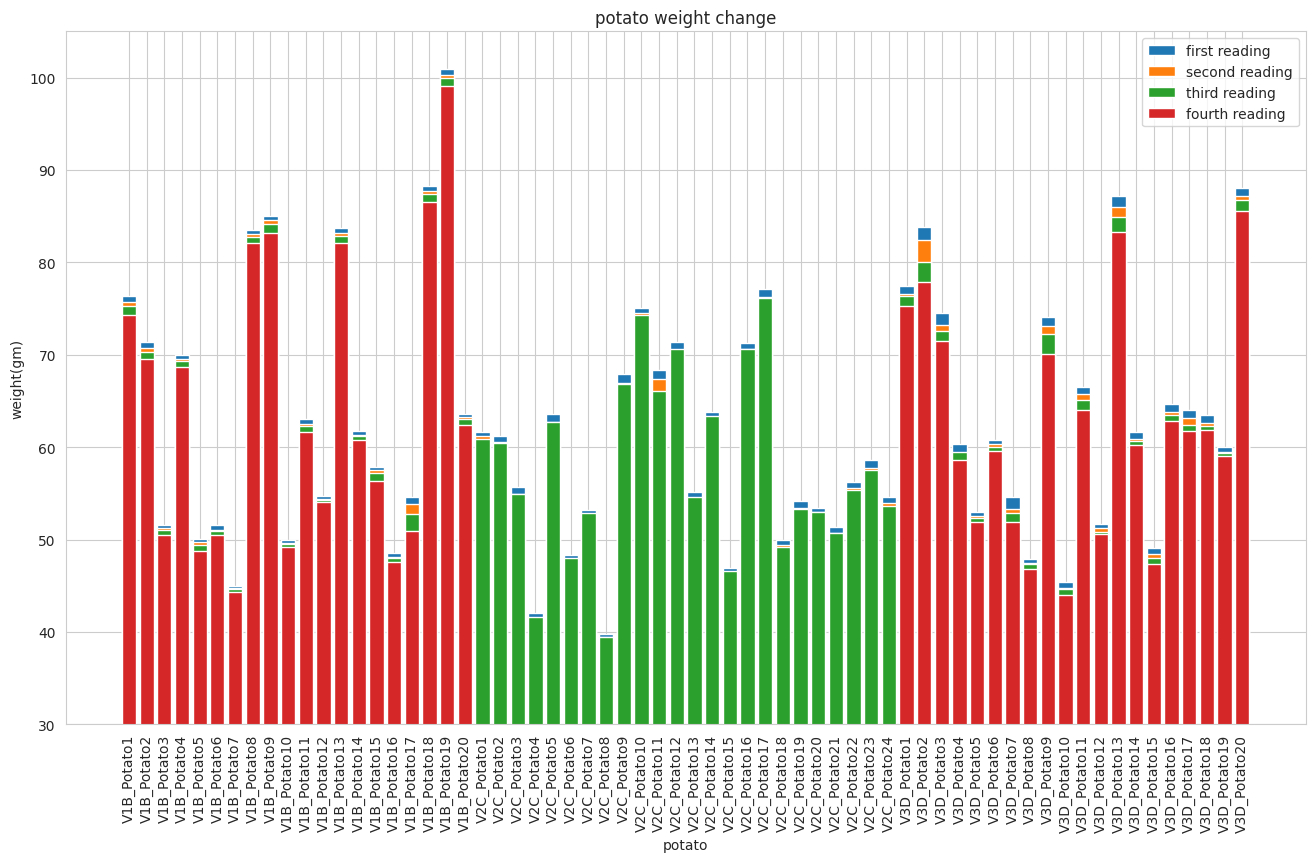

In [ ]:
plt.figure(figsize=(16,9))
plt.bar(df['name'], df['weight(gm)_day1'], label="first reading")
plt.bar(df['name'], df['weight(gm)_day2'], label="second reading")
plt.bar(df['name'], df['weight(gm)_day3'], label="third reading")
plt.bar(df['name'], df['weight(gm)_day4'], label="fourth reading")
max_y_lim = 105
min_y_lim = 30
plt.ylim(min_y_lim, max_y_lim)
plt.xlabel("potato")
plt.xticks(rotation = 90)
plt.ylabel("weight(gm)")
plt.title("potato weight change")
plt.legend()
plt.show()

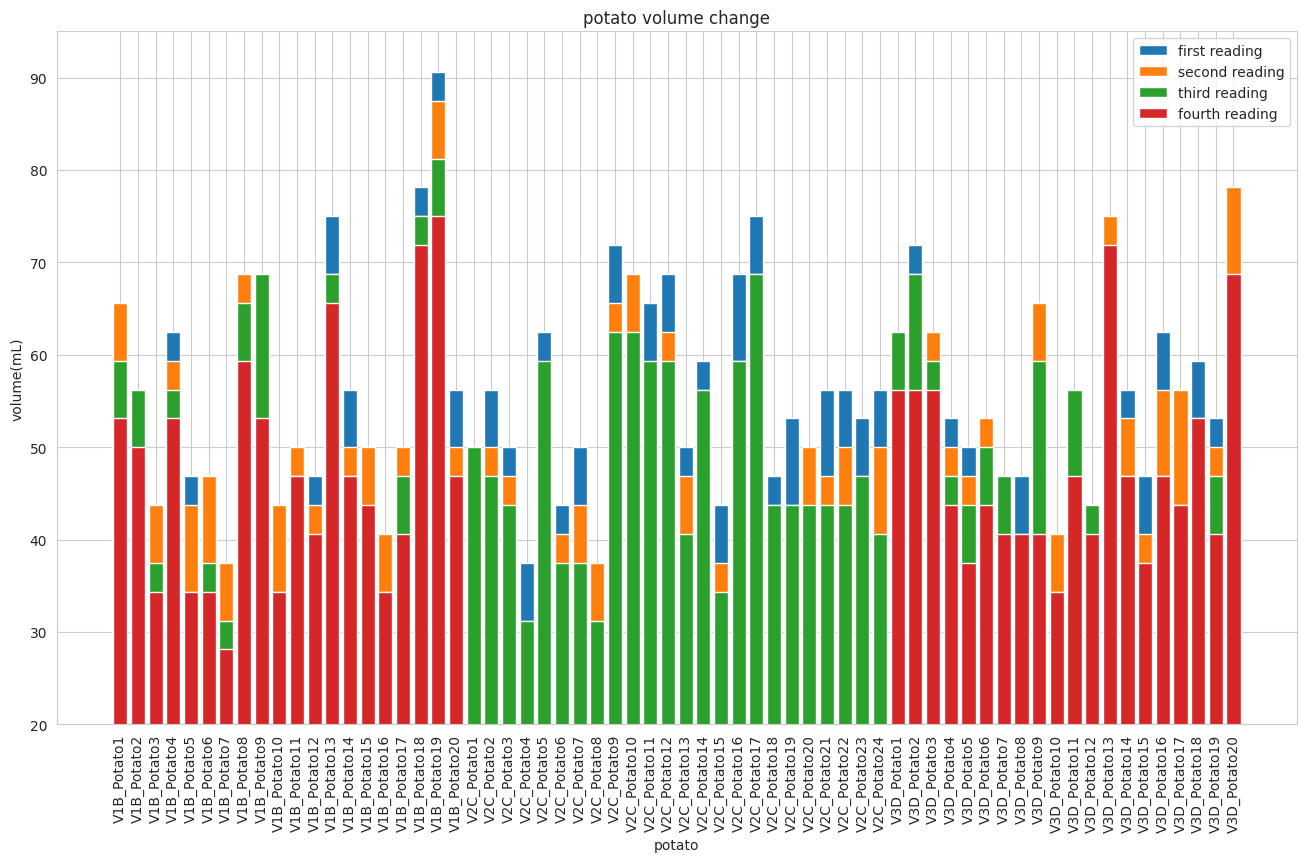

In [ ]:
plt.figure(figsize=(16,9))
plt.bar(df['name'], df['volume(mL)_day1'], label="first reading")
plt.bar(df['name'], df['volume(mL)_day2'], label="second reading")
plt.bar(df['name'], df['volume(mL)_day3'], label="third reading")
plt.bar(df['name'], df['volume(mL)_day4'], label="fourth reading")
max_y_lim = 95
min_y_lim = 20
plt.ylim(min_y_lim, max_y_lim)
plt.xlabel("potato")
plt.xticks(rotation = 90)
plt.ylabel("volume(mL)")
plt.title("potato volume change")
plt.legend()
plt.show()

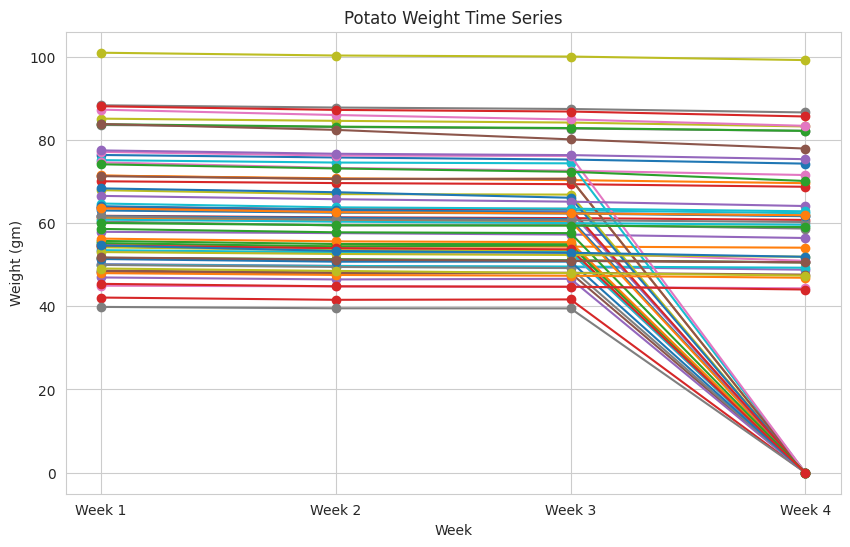

In [ ]:
df = df.fillna(0)
plt.figure(figsize=(10, 6))
for idx, row in df.iterrows():
    plt.plot(["Week 1", "Week 2", "Week 3", "Week 4"], row[1:5], marker='o', label=row['name'])
    # plt.plot(["Week 1", "Week 2", "Week 3", "Week 4"], row[5:], marker='o', label=row['name'])

plt.title("Potato Weight Time Series")
plt.xlabel("Week")
plt.ylabel("Weight (gm)")
# plt.legend()
plt.grid(True)
plt.show()

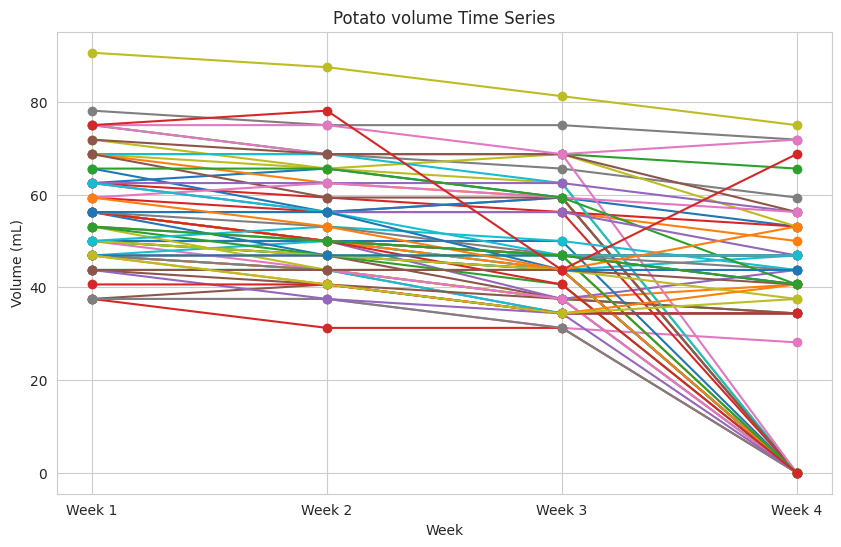

In [ ]:
plt.figure(figsize=(10, 6))
for idx, row in df.iterrows():
    # plt.plot(["Week 1", "Week 2", "Week 3", "Week 4"], row[1:5], marker='o', label=row['name'])
    plt.plot(["Week 1", "Week 2", "Week 3", "Week 4"], row[5:9], marker='o', label=row['name'])

plt.title("Potato volume Time Series")
plt.xlabel("Week")
plt.ylabel("Volume (mL)")
# plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculating average weight change and average volume change
df['weight_change1'] = (df['weight(gm)_day1'] - df['weight(gm)_day2'])
df['volume_change1'] = (df['volume(mL)_day1'] - df['volume(mL)_day2'])

# Calculating average weight change and average volume change
df['weight_change2'] = (df['weight(gm)_day2'] - df['weight(gm)_day3'])
df['volume_change2'] = (df['volume(mL)_day2'] - df['volume(mL)_day3'])

# Calculating average weight change and average volume change
df['weight_change3'] = (df['weight(gm)_day3'] - df['weight(gm)_day4'])
df['volume_change3'] = (df['volume(mL)_day3'] - df['volume(mL)_day4'])
df

,name,weight(gm)_day1,weight(gm)_day2,weight(gm)_day3,weight(gm)_day4,volume(mL)_day1,volume(mL)_day2,volume(mL)_day3,volume(mL)_day4,species,weight_change1,volume_change1,weight_change2,volume_change2,weight_change3,volume_change3
0,V1B_Potato1,76.35,75.75,75.25,74.27,62.500,65.625,59.375,53.125,V1B,0.60,-3.125,0.50,6.250,0.98,6.250
1,V1B_Potato2,71.36,70.75,70.31,69.57,56.250,56.250,56.250,50.000,V1B,0.61,0.000,0.44,0.000,0.74,6.250
2,V1B_Potato3,51.63,51.31,51.05,50.53,43.750,43.750,37.500,34.375,V1B,0.32,0.000,0.26,6.250,0.52,3.125
3,V1B_Potato4,70.03,69.60,69.33,68.71,62.500,59.375,56.250,53.125,V1B,0.43,3.125,0.27,3.125,0.62,3.125
4,V1B_Potato5,50.12,49.70,49.42,48.78,46.875,43.750,34.375,34.375,V1B,0.42,3.125,0.28,9.375,0.64,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,V3D_Potato16,64.68,63.77,63.45,62.82,62.500,56.250,46.875,46.875,V3D,0.91,6.250,0.32,9.375,0.63,0.000
60,V3D_Potato17,64.04,63.20,62.45,61.75,56.250,56.250,43.750,43.750,V3D,0.84,0.000,0.75,12.500,0.70,0.000
61,V3D_Potato18,63.51,62.60,62.31,61.87,59.375,53.125,43.750,53.125,V3D,0.91,6.250,0.29,9.375,0.44,-9.375
62,V3D_Potato19,60.01,59.47,59.37,59.02,53.125,50.000,46.875,40.625,V3D,0.54,3.125,0.10,3.125,0.35,6.250


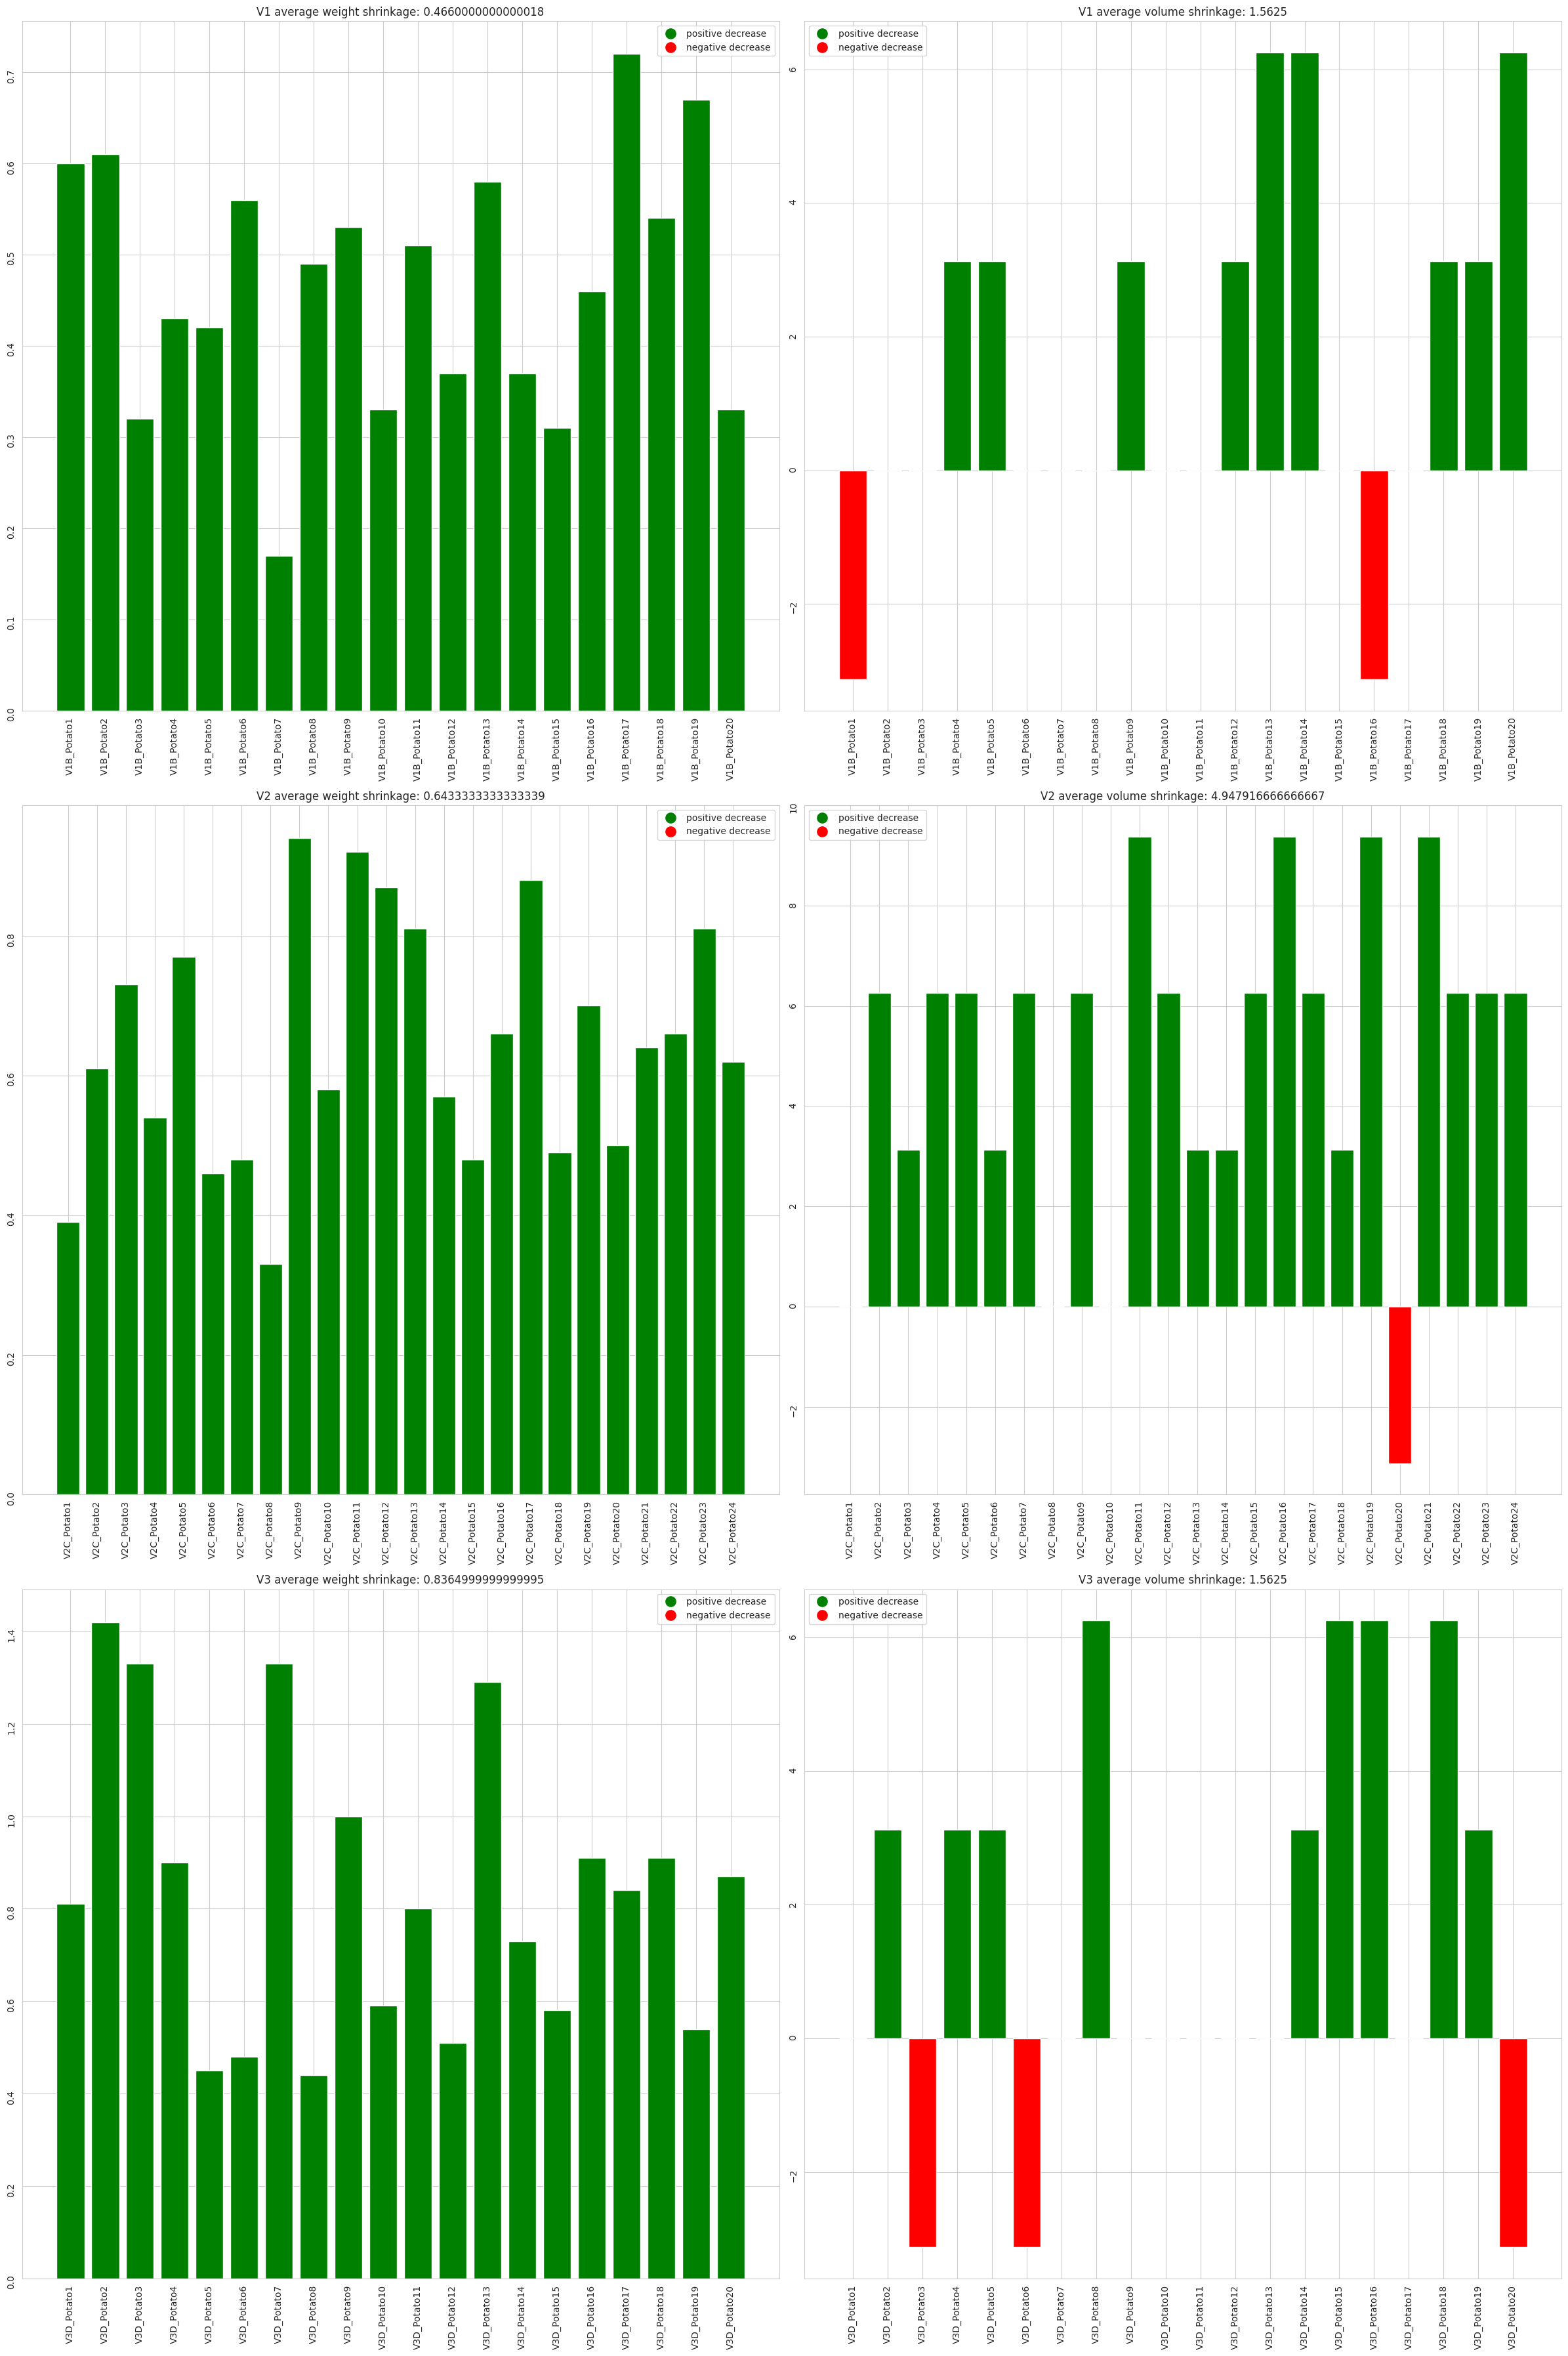

In [ ]:
from matplotlib.lines import Line2D
df_grouped = df.groupby(['species'])
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(24,36))

for i in range(3):
    ax[i][0].bar(df_grouped.get_group(df['species'].unique()[i])['name'], df_grouped.get_group(df['species'].unique()[i])['weight_change1'],
                 label="weight_change", color=['r' if v < 0 else 'g' for v in df_grouped.get_group(df['species'].unique()[i])['weight_change1']])
    ax[i][0].tick_params(labelrotation=90)
    ax[i][0].set_title("V{} average weight shrinkage: {}".format(i+1, df_grouped.get_group(df['species'].unique()[i])['weight_change1'].mean()))
    legend_handles = [Line2D([0], [0], linewidth=0, marker='o', markerfacecolor=color, markersize=12, markeredgecolor='none')
              for color in ['g', 'r']]
    ax[i][0].legend(legend_handles, ['positive decrease', 'negative decrease'])

    ax[i][1].bar(df_grouped.get_group(df['species'].unique()[i])['name'], df_grouped.get_group(df['species'].unique()[i])['volume_change1'],
                 label="volume_change", color=['r' if v < 0 else 'g' for v in df_grouped.get_group(df['species'].unique()[i])['volume_change1']])
    ax[i][1].tick_params(labelrotation=90)
    ax[i][1].set_title("V{} average volume shrinkage: {}".format(i+1, df_grouped.get_group(df['species'].unique()[i])['volume_change1'].mean()))
    legend_handles = [Line2D([0], [0], linewidth=0, marker='o', markerfacecolor=color, markersize=12, markeredgecolor='none')
              for color in ['g', 'r']]
    ax[i][1].legend(legend_handles, ['positive decrease', 'negative decrease'])
plt.tight_layout()

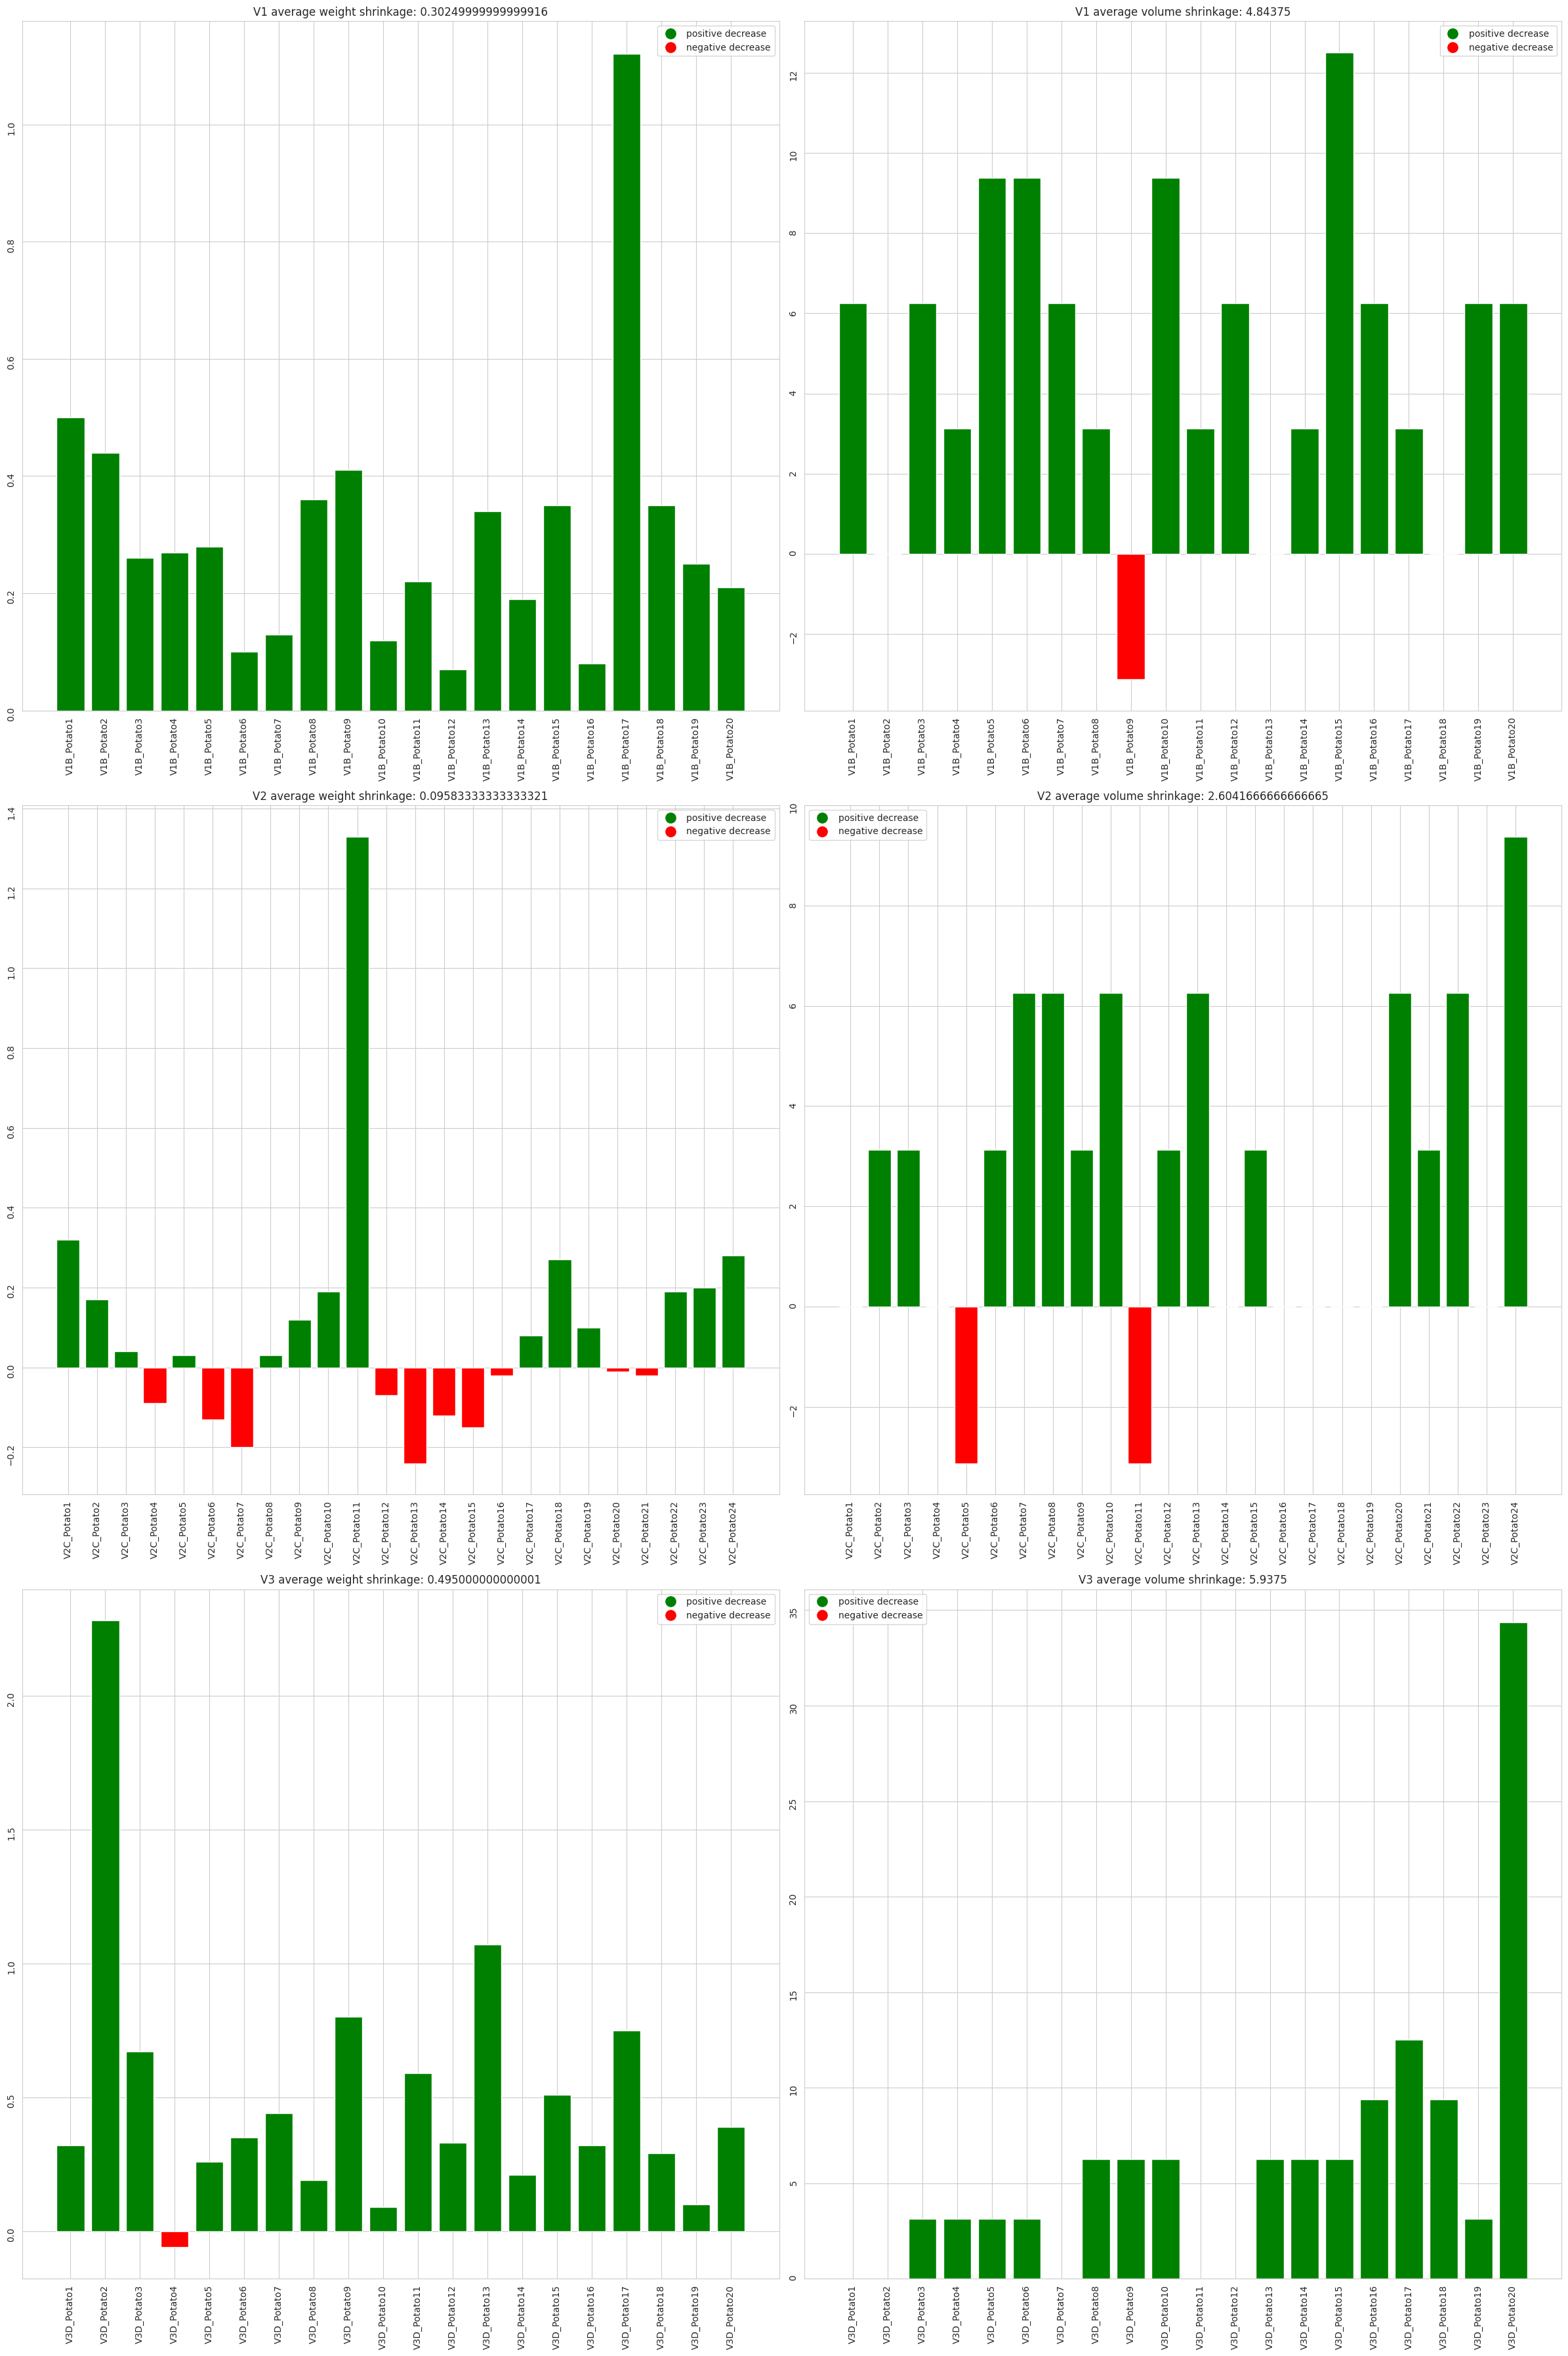

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(24,36))

for i in range(3):
    ax[i][0].bar(df_grouped.get_group(df['species'].unique()[i])['name'], df_grouped.get_group(df['species'].unique()[i])['weight_change2'],
                 label="weight_change", color=['r' if v < 0 else 'g' for v in df_grouped.get_group(df['species'].unique()[i])['weight_change2']])
    ax[i][0].tick_params(labelrotation=90)
    ax[i][0].set_title("V{} average weight shrinkage: {}".format(i+1, df_grouped.get_group(df['species'].unique()[i])['weight_change2'].mean()))
    legend_handles = [Line2D([0], [0], linewidth=0, marker='o', markerfacecolor=color, markersize=12, markeredgecolor='none')
              for color in ['g', 'r']]
    ax[i][0].legend(legend_handles, ['positive decrease', 'negative decrease'])

    ax[i][1].bar(df_grouped.get_group(df['species'].unique()[i])['name'], df_grouped.get_group(df['species'].unique()[i])['volume_change2'],
                 label="volume_change", color=['r' if v < 0 else 'g' for v in df_grouped.get_group(df['species'].unique()[i])['volume_change2']])
    ax[i][1].tick_params(labelrotation=90)
    ax[i][1].set_title("V{} average volume shrinkage: {}".format(i+1, df_grouped.get_group(df['species'].unique()[i])['volume_change2'].mean()))
    legend_handles = [Line2D([0], [0], linewidth=0, marker='o', markerfacecolor=color, markersize=12, markeredgecolor='none')
              for color in ['g', 'r']]
    ax[i][1].legend(legend_handles, ['positive decrease', 'negative decrease'])
plt.tight_layout()

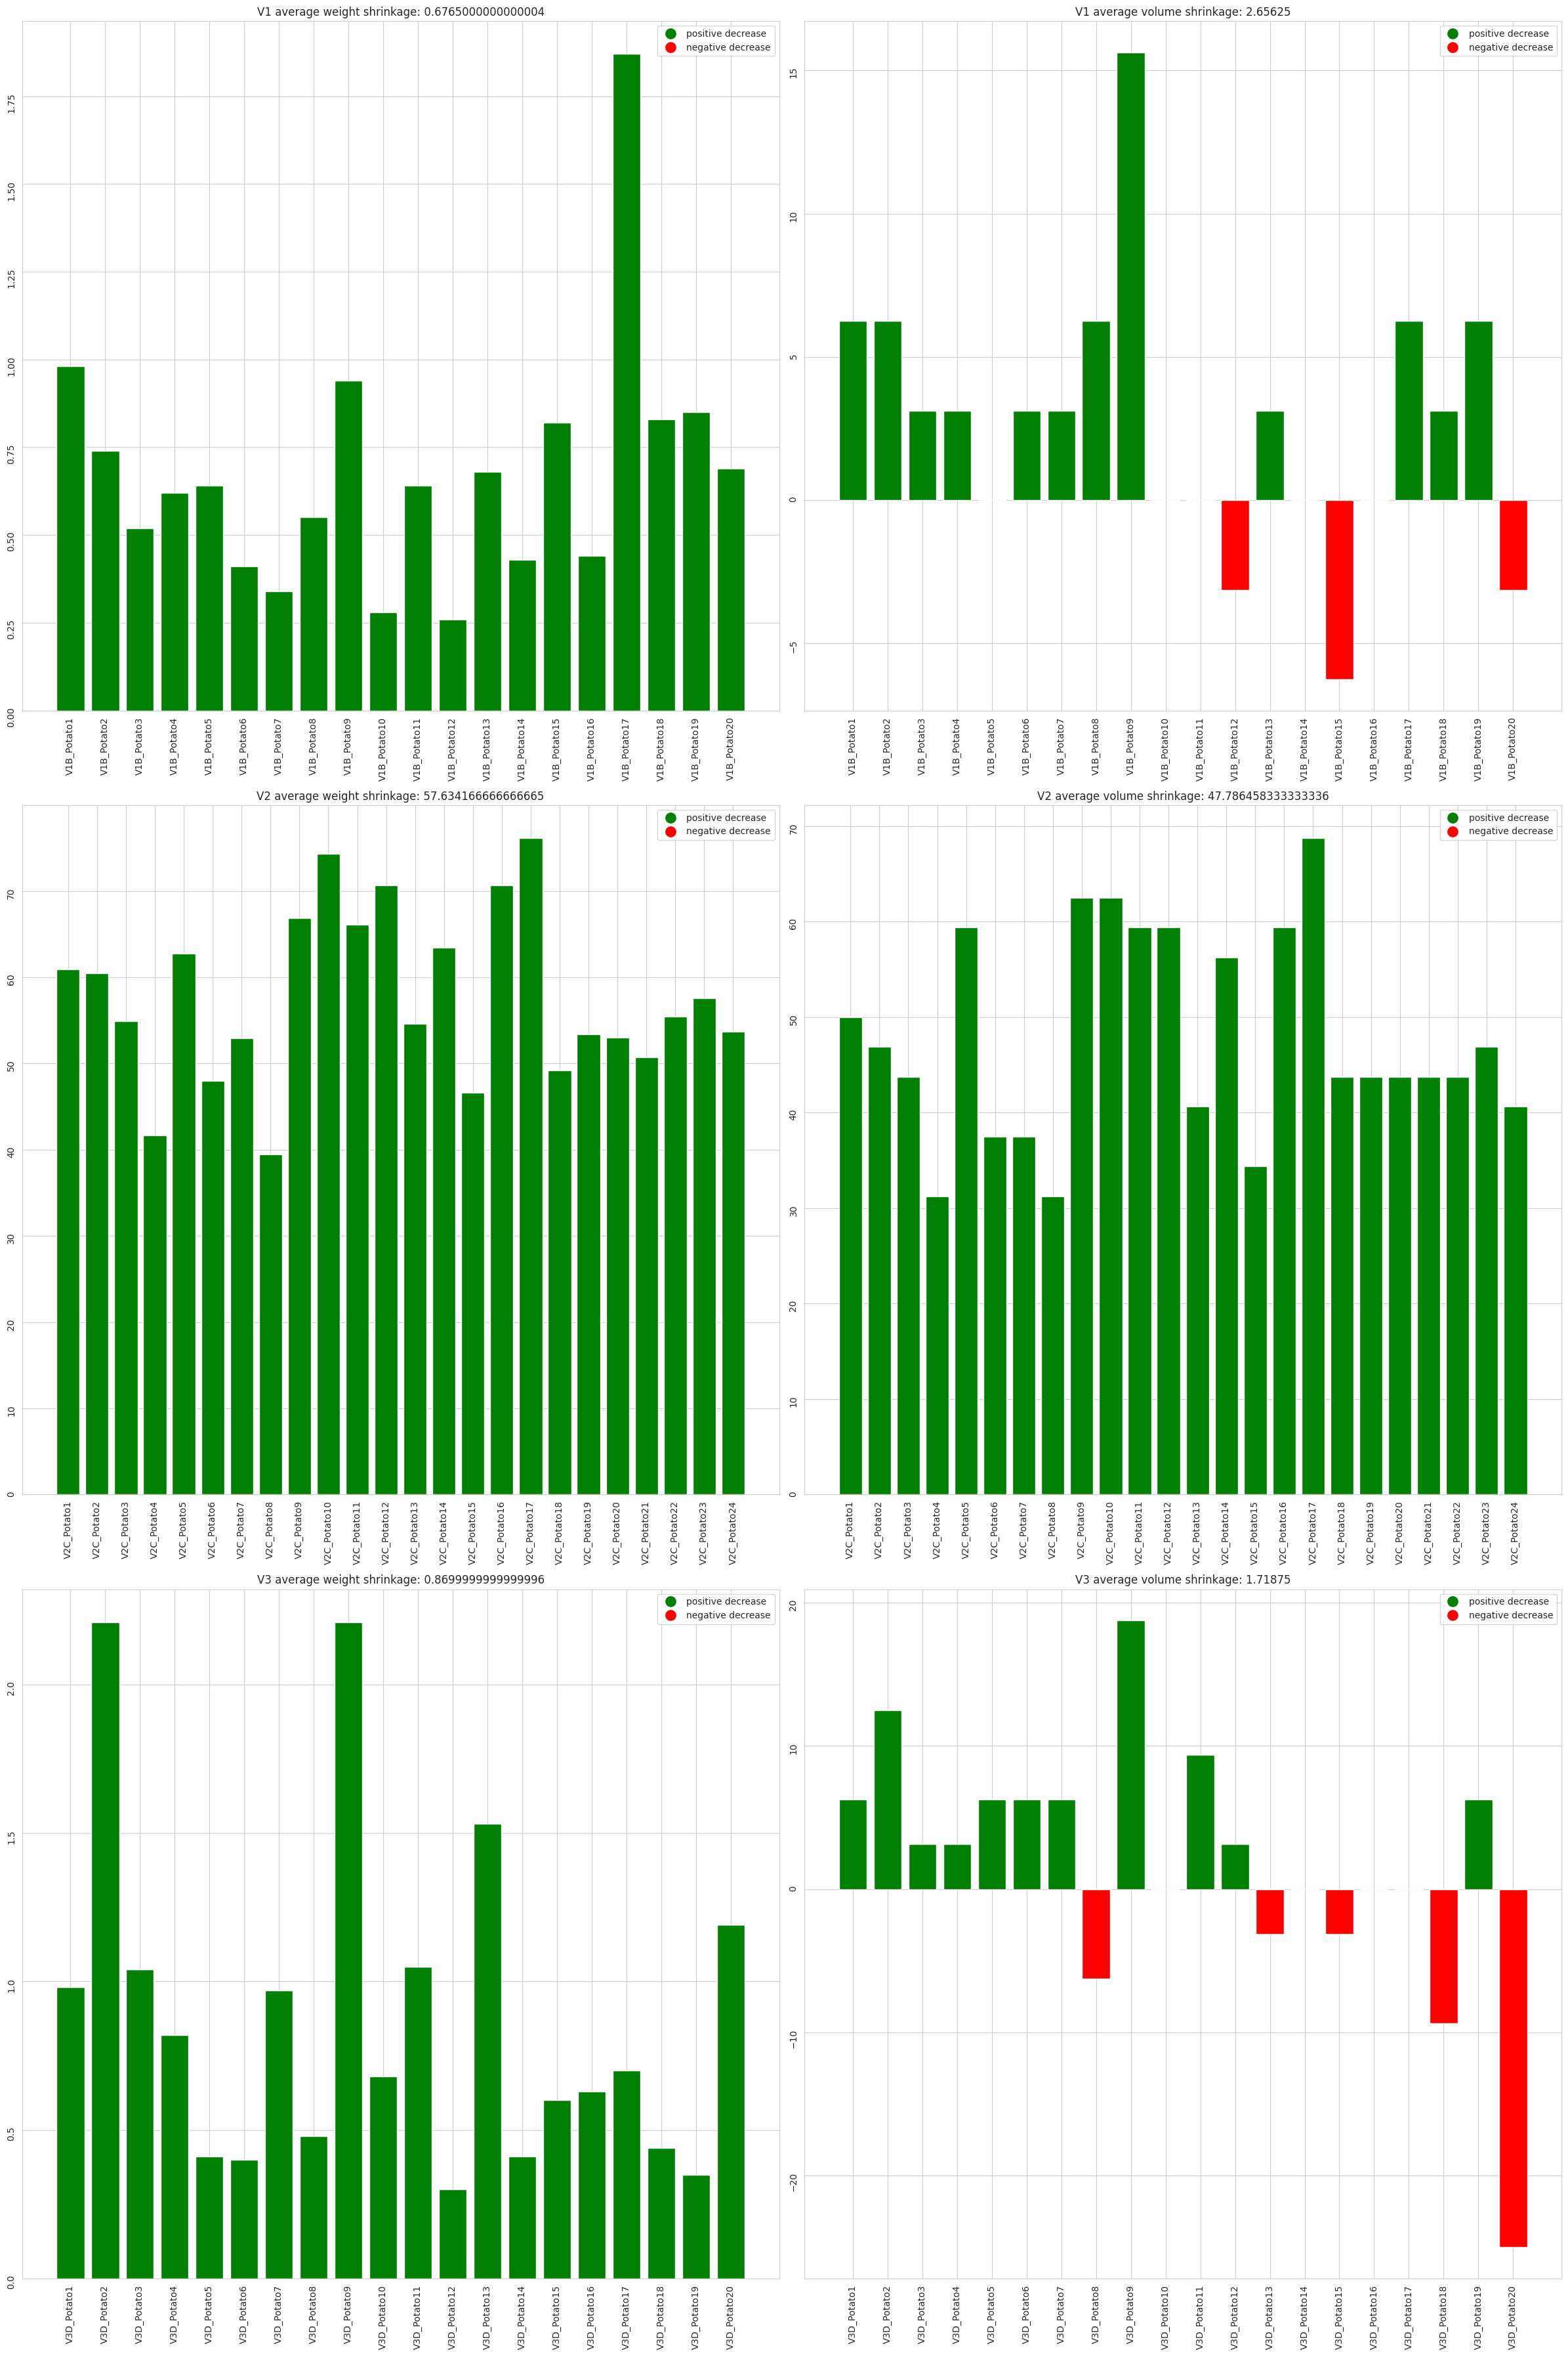

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(24,36))

for i in range(3):
    ax[i][0].bar(df_grouped.get_group(df['species'].unique()[i])['name'], df_grouped.get_group(df['species'].unique()[i])['weight_change3'],
                 label="weight_change", color=['r' if v < 0 else 'g' for v in df_grouped.get_group(df['species'].unique()[i])['weight_change3']])
    ax[i][0].tick_params(labelrotation=90)
    ax[i][0].set_title("V{} average weight shrinkage: {}".format(i+1, df_grouped.get_group(df['species'].unique()[i])['weight_change3'].mean()))
    legend_handles = [Line2D([0], [0], linewidth=0, marker='o', markerfacecolor=color, markersize=12, markeredgecolor='none')
              for color in ['g', 'r']]
    ax[i][0].legend(legend_handles, ['positive decrease', 'negative decrease'])

    ax[i][1].bar(df_grouped.get_group(df['species'].unique()[i])['name'], df_grouped.get_group(df['species'].unique()[i])['volume_change3'],
                 label="volume_change", color=['r' if v < 0 else 'g' for v in df_grouped.get_group(df['species'].unique()[i])['volume_change3']])
    ax[i][1].tick_params(labelrotation=90)
    ax[i][1].set_title("V{} average volume shrinkage: {}".format(i+1, df_grouped.get_group(df['species'].unique()[i])['volume_change3'].mean()))
    legend_handles = [Line2D([0], [0], linewidth=0, marker='o', markerfacecolor=color, markersize=12, markeredgecolor='none')
              for color in ['g', 'r']]
    ax[i][1].legend(legend_handles, ['positive decrease', 'negative decrease'])
plt.tight_layout()

## Time-Series analysis

In [ ]:
data1 = pd.merge(df1, df2, 'outer', on = ['name'])
data2 = pd.merge(df3, df4, 'outer', on = ['name'])
data = pd.merge(data1, data2, 'outer', on = ['name'])
df = data[['name', 'weight(gm)_day1', 'weight(gm)_day2', 'weight(gm)_day3', 'weight(gm)_day4', 'volume(mL)_day1', 'volume(mL)_day2', 'volume(mL)_day3', 'volume(mL)_day4']]
def changeName(row):
    row['species'] = row['name'][:3]
    return row
df = df.apply(changeName, axis=1)
df_grouped = df.groupby(['species'])
df.head()

,name,weight(gm)_day1,weight(gm)_day2,weight(gm)_day3,weight(gm)_day4,volume(mL)_day1,volume(mL)_day2,volume(mL)_day3,volume(mL)_day4,species
0,V1B_Potato1,76.35,75.75,75.25,74.27,62.500,65.625,59.375,53.125,V1B
1,V1B_Potato2,71.36,70.75,70.31,69.57,56.250,56.250,56.250,50.000,V1B
2,V1B_Potato3,51.63,51.31,51.05,50.53,43.750,43.750,37.500,34.375,V1B
3,V1B_Potato4,70.03,69.60,69.33,68.71,62.500,59.375,56.250,53.125,V1B
4,V1B_Potato5,50.12,49.70,49.42,48.78,46.875,43.750,34.375,34.375,V1B


### Time series over weeks

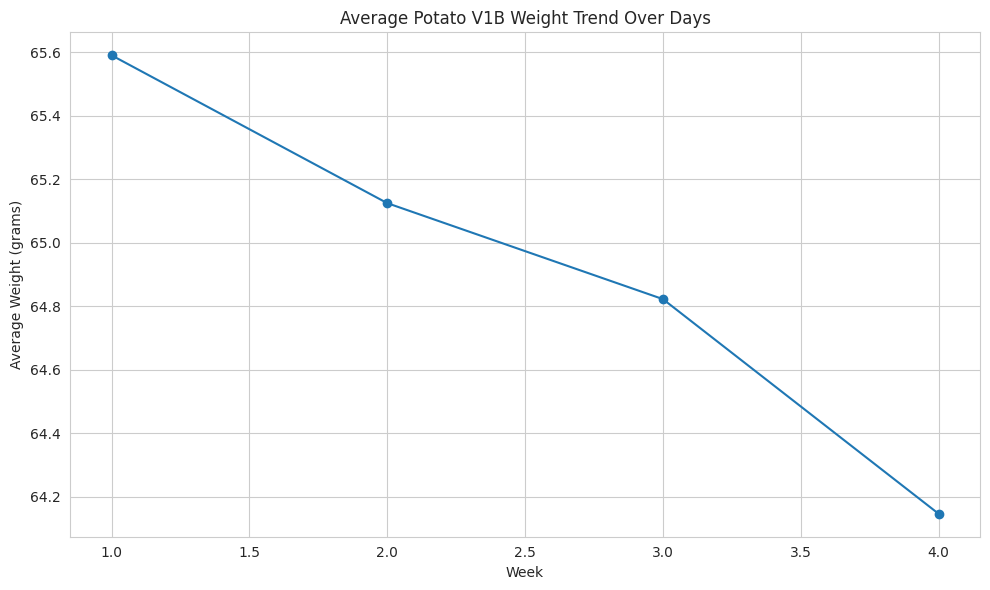

In [ ]:
# Melt the DataFrame to transform weeks into a single "week" column and days into a "day" column
species = 'V1B'
df_melted = pd.melt(df_grouped.get_group(species), id_vars=["name"], value_vars=["weight(gm)_day1", "weight(gm)_day2", "weight(gm)_day3", "weight(gm)_day4"],
                     var_name="week", value_name="weight")

# Add day information
df_melted["day"] = df_melted["week"].str.extract("(\d+)").astype(int)

# Calculate average weight for each day
average_weight_per_day = df_melted.groupby("day")["weight"].mean()

# Create a plot for the average weight trend
plt.figure(figsize=(10, 6))
plt.plot(average_weight_per_day.index, average_weight_per_day.values, marker='o')
plt.title("Average Potato V1B Weight Trend Over Days")
plt.xlabel("Week")
plt.ylabel("Average Weight (grams)")
plt.grid(True)
plt.tight_layout()
plt.show()

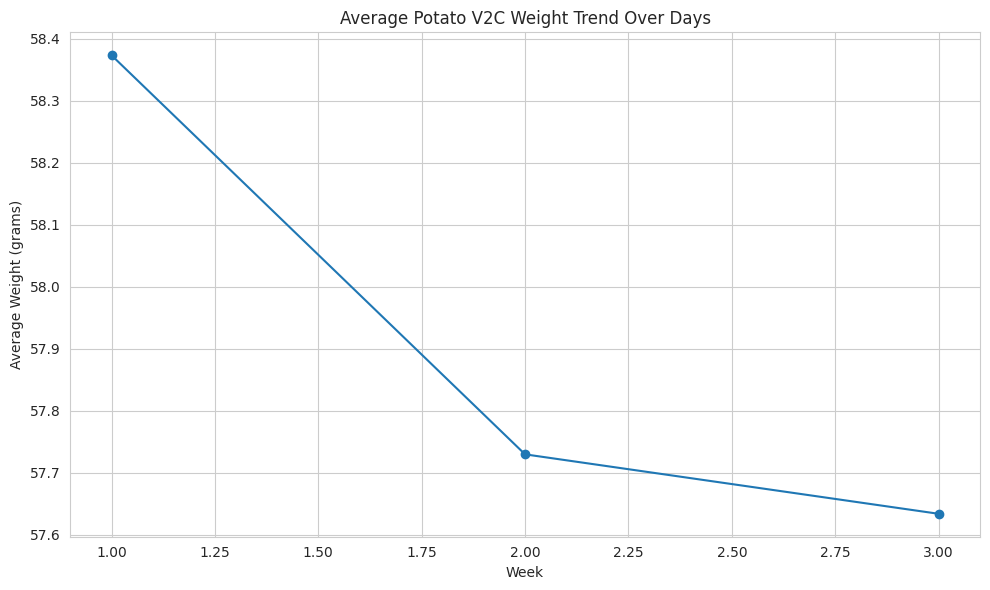

In [ ]:
# Melt the DataFrame to transform weeks into a single "week" column and days into a "day" column
species = 'V2C'
df_melted = pd.melt(df_grouped.get_group(species), id_vars=["name"], value_vars=["weight(gm)_day1", "weight(gm)_day2", "weight(gm)_day3", "weight(gm)_day4"],
                     var_name="week", value_name="weight")

# Add day information
df_melted["day"] = df_melted["week"].str.extract("(\d+)").astype(int)

# Calculate average weight for each day
average_weight_per_day = df_melted.groupby("day")["weight"].mean()

# Create a plot for the average weight trend
plt.figure(figsize=(10, 6))
plt.plot(average_weight_per_day.index, average_weight_per_day.values, marker='o')
plt.title("Average Potato V2C Weight Trend Over Days")
plt.xlabel("Week")
plt.ylabel("Average Weight (grams)")
plt.grid(True)
plt.tight_layout()
plt.show()

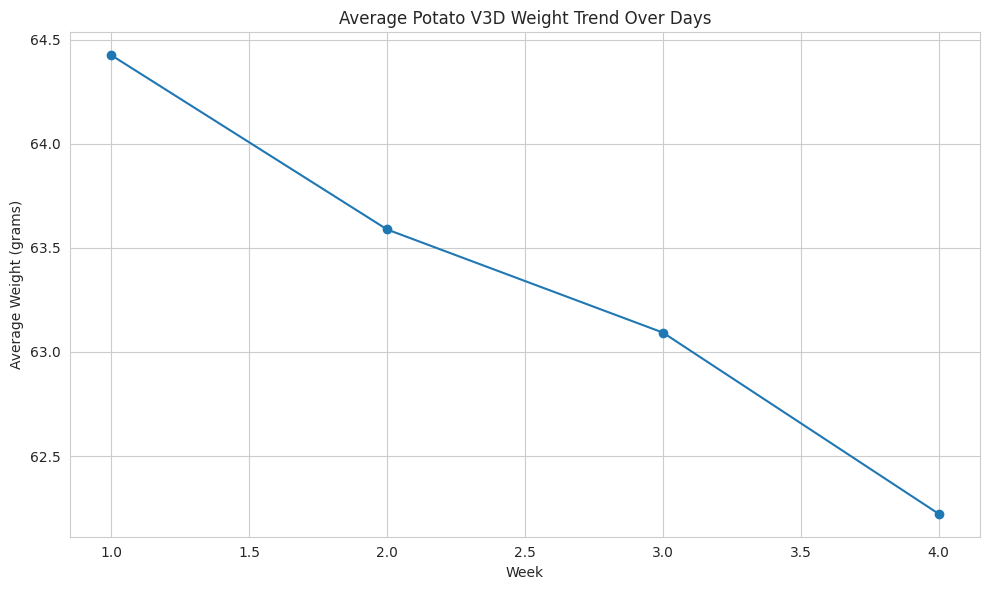

In [ ]:
# Melt the DataFrame to transform weeks into a single "week" column and days into a "day" column
species = 'V3D'
df_melted = pd.melt(df_grouped.get_group(species), id_vars=["name"], value_vars=["weight(gm)_day1", "weight(gm)_day2", "weight(gm)_day3", "weight(gm)_day4"],
                     var_name="week", value_name="weight")

# Add day information
df_melted["day"] = df_melted["week"].str.extract("(\d+)").astype(int)

# Calculate average weight for each day
average_weight_per_day = df_melted.groupby("day")["weight"].mean()

# Create a plot for the average weight trend
plt.figure(figsize=(10, 6))
plt.plot(average_weight_per_day.index, average_weight_per_day.values, marker='o')
plt.title("Average Potato V3D Weight Trend Over Days")
plt.xlabel("Week")
plt.ylabel("Average Weight (grams)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Time series over days

In [ ]:
def overDays(species, value, start_date = '2023-07-31'):
    # Melt the DataFrame to transform weeks into a single "week" column and days into a "day" column

    df_melted = pd.melt(df_grouped.get_group(species), id_vars=["name"], value_vars=[value+"_day1", value+"_day2", value+"_day3", value+"_day4"],
                        var_name="week", value_name=value)

    # Add day information
    df_melted["day"] = df_melted["week"].str.extract("(\d+)").astype(int)

    # Calculate average weight for each day
    average_weight_per_day = df_melted.groupby("day")[value].mean()

    data = average_weight_per_day.to_frame().reset_index()
    # Create a new DataFrame with the desired format
    new_data = {
        'name': [species],
        value+'_week1': [data[value].iloc[0]],
        value+'_week2': [data[value].iloc[1]],
        value+'_week3': [data[value].iloc[2]],
        value+'_week4': [data[value].iloc[3]]
    }

    data = pd.DataFrame(new_data)

    # Display the new DataFrame
    print(data)

    # Convert the week columns to a more usable format
    week_columns = data.columns[1:]

    import math
    def avgChange(df, week_columns):
        # Calculate the average change
        total_change = 0
        num_changes = 0

        for i in range(len(week_columns) - 1):
            if not pd.isnull(df.at[0, week_columns[i]]) and not pd.isnull(df.at[0, week_columns[i + 1]]):
                change = df.at[0, week_columns[i + 1]] - df.at[0, week_columns[i]]
                total_change += change
                num_changes += 1

        if num_changes > 0:
            average_change = total_change / num_changes
            # print("Average Change:", average_change)
        else:
            return math.inf
            print("No valid changes found.")

        return average_change


    # Create a new DataFrame for expanded data
    expanded_data = []

    # Define the date range for four weeks (starting on a Monday)
    date_range = pd.date_range(start=start_date, periods=28, freq='D')  # Adjust the start date accordingly

    for date in date_range:
        row = {'Date': date}
        week_number = (date - date_range[0]).days // 7 + 1  # Calculate week number
        if date.weekday() == 0:  # Monday
            weight_col = f'{value}_week{week_number}'
            row[value] = data.at[0, weight_col]
        else:
            row[value] = None
        expanded_data.append(row)

    # Create the expanded DataFrame
    expanded_df = pd.DataFrame(expanded_data)

    if species == 'V2C':
        expanded_df.iloc[-7,-1] = expanded_df.iloc[-14,-1] + avgChange(data, week_columns)

    expanded_df.iloc[-1,-1] = expanded_df.iloc[-7,-1] + avgChange(data, week_columns)
    expanded_df[value] = expanded_df[value].interpolate()
    expanded_df['days'] = ['day{}'.format(i + 1) for i in range(len(expanded_df))]
    # Display the expanded DataFrame
    # print(expanded_df)

    # Create a plot for the average weight trend
    plt.plot(expanded_df.days, expanded_df[value], marker='o', label=species)

    # Customize x-axis ticks to show different color ticks after 7 days
    for i, days in enumerate(expanded_df.days):
        if i % 3 == 0:  # Every 7 days
            plt.axvline(x=days, color='green', linestyle='--', alpha=0.5)


    plt.xlabel("Week")
    plt.ylabel("Average {}".format(value))
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(expanded_df.days, rotation=90)
    plt.legend(loc='upper right')
    return None

#### Weight

  name  weight(gm)_week1  weight(gm)_week2  weight(gm)_week3  weight(gm)_week4
0  V1B            65.591            65.125           64.8225            64.146


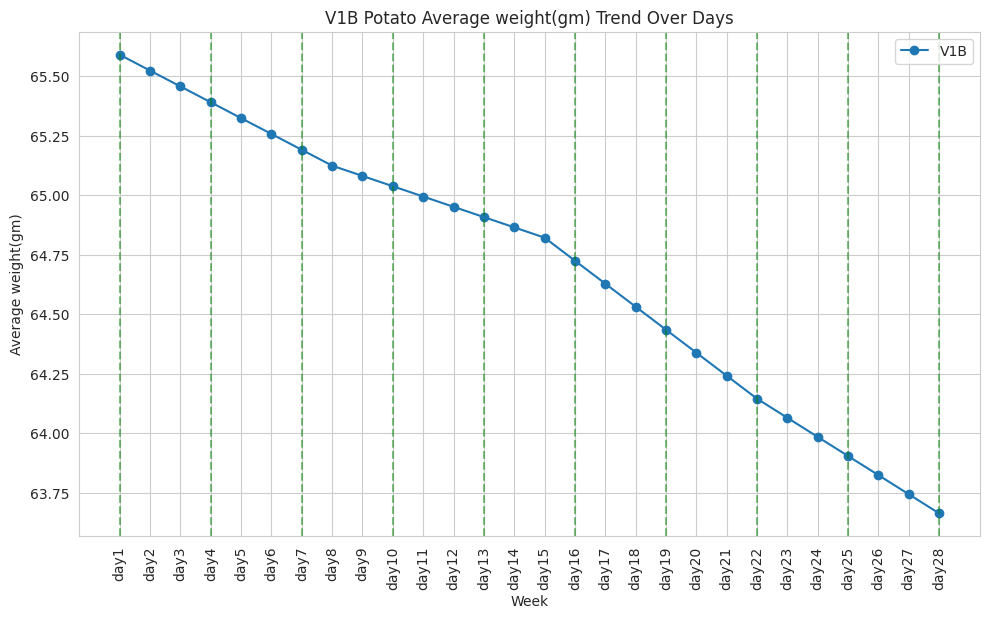

In [ ]:
value = 'weight(gm)'
start_date = '2023-07-31'
species = 'V1B'
plt.figure(figsize=(10, 6))

plt.title(f"{species} Potato Average {value} Trend Over Days")
overDays(species, value, start_date)

  name  weight(gm)_week1  weight(gm)_week2  weight(gm)_week3  weight(gm)_week4
0  V2C         58.373333             57.73         57.634167               NaN


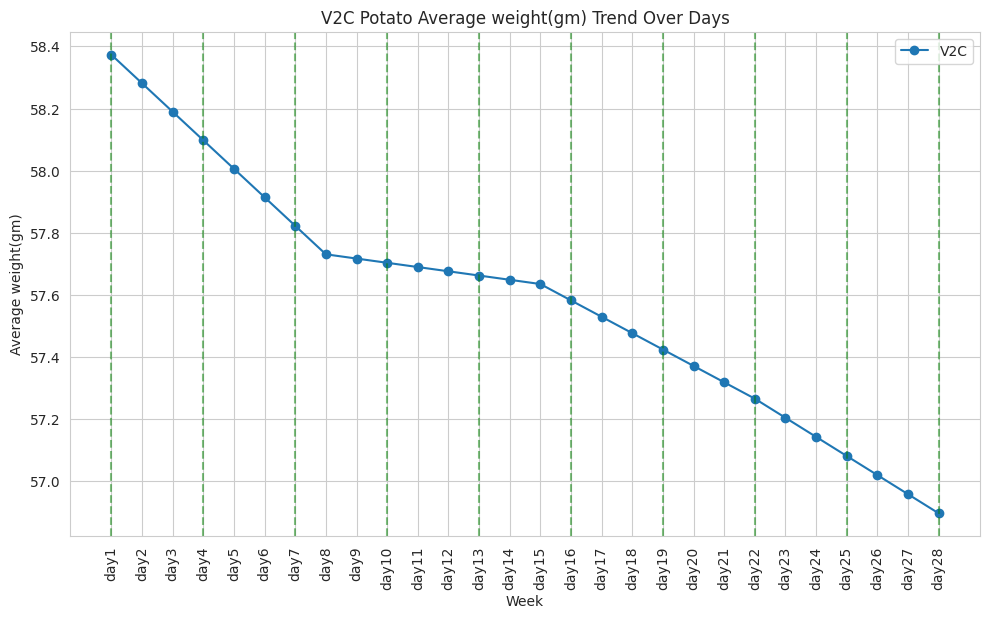

In [ ]:
value = 'weight(gm)'
start_date = '2023-07-31'
species = 'V2C'
plt.figure(figsize=(10, 6))

plt.title(f"{species} Potato Average {value} Trend Over Days")
overDays(species, value, start_date)

  name  weight(gm)_week1  weight(gm)_week2  weight(gm)_week3  weight(gm)_week4
0  V3D           64.4245            63.588            63.093            62.223


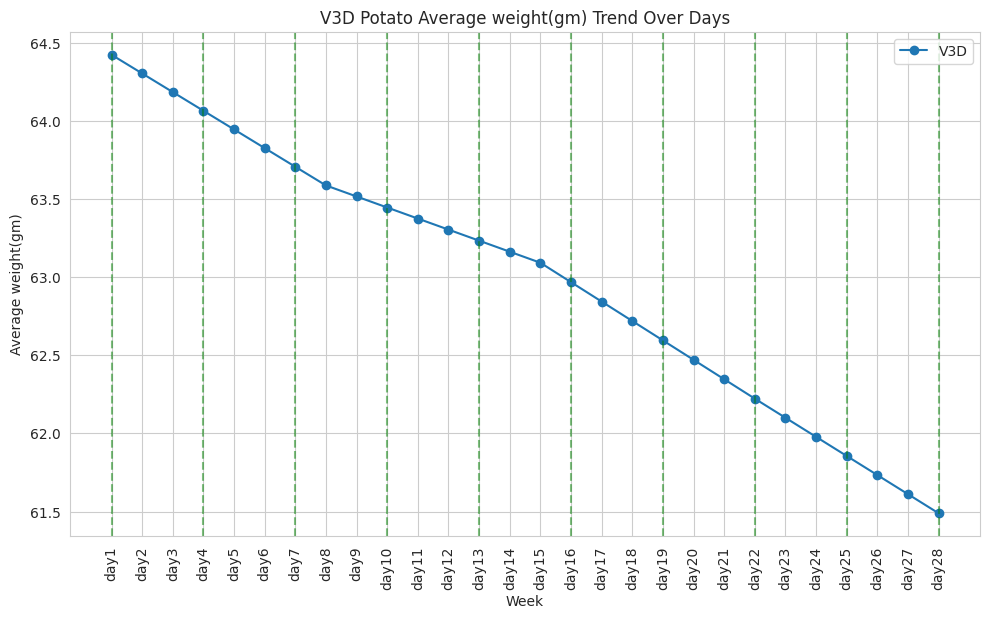

In [ ]:
value = 'weight(gm)'
start_date = '2023-07-31'
species = 'V3D'
plt.figure(figsize=(10, 6))

plt.title(f"{species} Potato Average {value} Trend Over Days")
overDays(species, value, start_date)

#### Volume

  name  volume(mL)_week1  volume(mL)_week2  volume(mL)_week3  volume(mL)_week4
0  V1B          56.40625          54.84375              50.0          47.34375


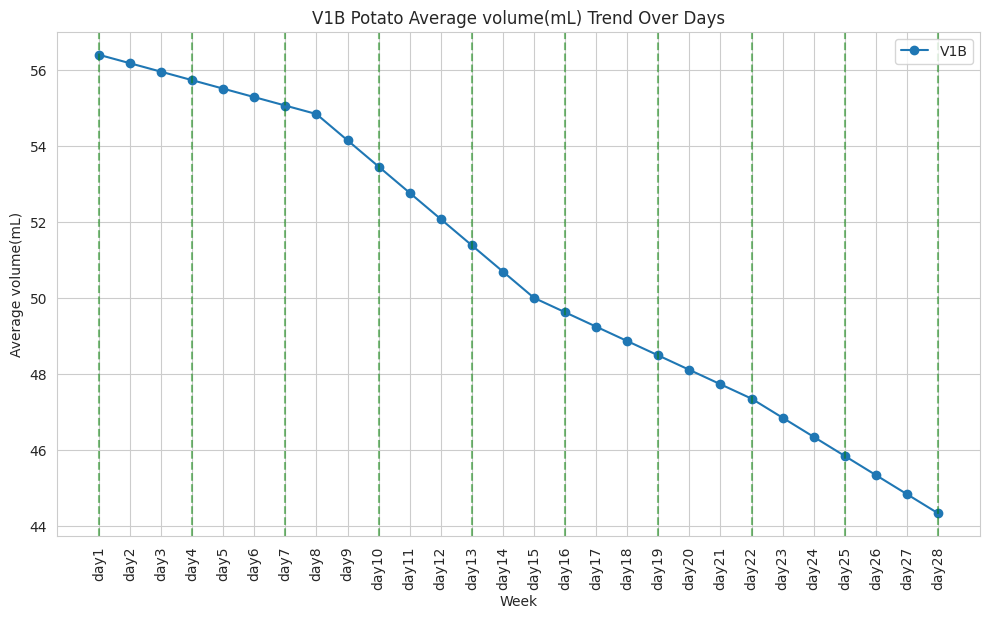

In [ ]:
value = 'volume(mL)'
start_date = '2023-07-31'
species = 'V1B'
plt.figure(figsize=(10, 6))

plt.title(f"{species} Potato Average {value} Trend Over Days")
overDays(species, value, start_date)

  name  volume(mL)_week1  volume(mL)_week2  volume(mL)_week3  volume(mL)_week4
0  V2C         55.338542         50.390625         47.786458               NaN


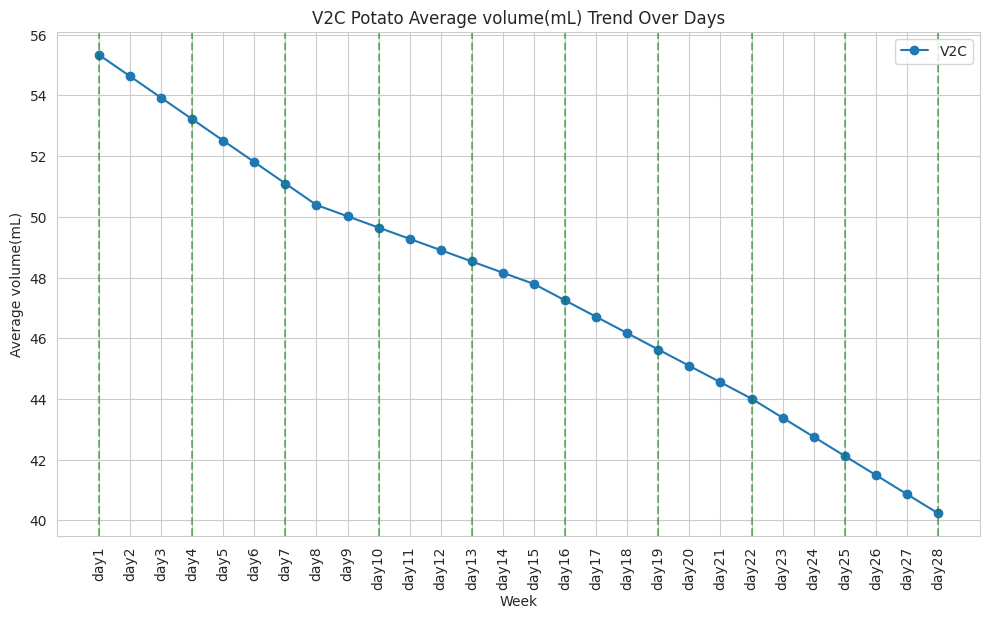

In [ ]:
value = 'volume(mL)'
start_date = '2023-07-31'
species = 'V2C'
plt.figure(figsize=(10, 6))

plt.title(f"{species} Potato Average {value} Trend Over Days")
overDays(species, value, start_date)

  name  volume(mL)_week1  volume(mL)_week2  volume(mL)_week3  volume(mL)_week4
0  V3D           56.5625              55.0           49.0625          47.34375


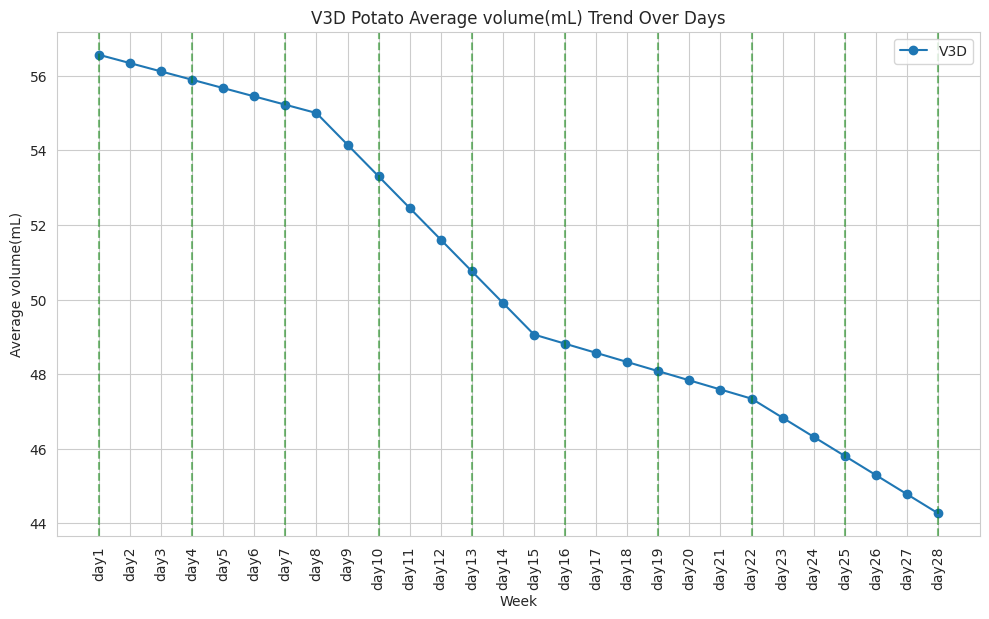

In [ ]:
value = 'volume(mL)'
start_date = '2023-07-31'
species = 'V3D'
plt.figure(figsize=(10, 6))

plt.title(f"{species} Potato Average {value} Trend Over Days")
overDays(species, value, start_date)

### Time series over days- 3 species together

#### weight(gm)

  name  weight(gm)_week1  weight(gm)_week2  weight(gm)_week3  weight(gm)_week4
0  V1B            65.591            65.125           64.8225            64.146
  name  weight(gm)_week1  weight(gm)_week2  weight(gm)_week3  weight(gm)_week4
0  V2C         58.373333             57.73         57.634167               NaN
  name  weight(gm)_week1  weight(gm)_week2  weight(gm)_week3  weight(gm)_week4
0  V3D           64.4245            63.588            63.093            62.223


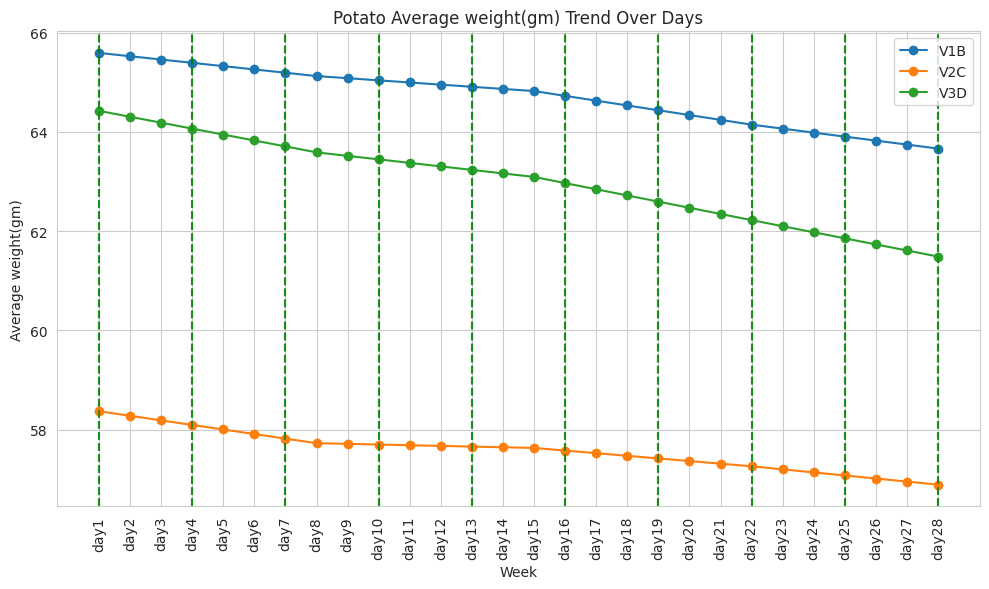

In [ ]:
value = 'weight(gm)'
start_date = '2023-07-31'

plt.figure(figsize=(10, 6))

plt.title(f"Potato Average {value} Trend Over Days")
for species in ['V1B', 'V2C', 'V3D']:
  overDays(species, value, start_date)

#### volume(mL)

  name  volume(mL)_week1  volume(mL)_week2  volume(mL)_week3  volume(mL)_week4
0  V1B          56.40625          54.84375              50.0          47.34375
  name  volume(mL)_week1  volume(mL)_week2  volume(mL)_week3  volume(mL)_week4
0  V2C         55.338542         50.390625         47.786458               NaN
  name  volume(mL)_week1  volume(mL)_week2  volume(mL)_week3  volume(mL)_week4
0  V3D           56.5625              55.0           49.0625          47.34375


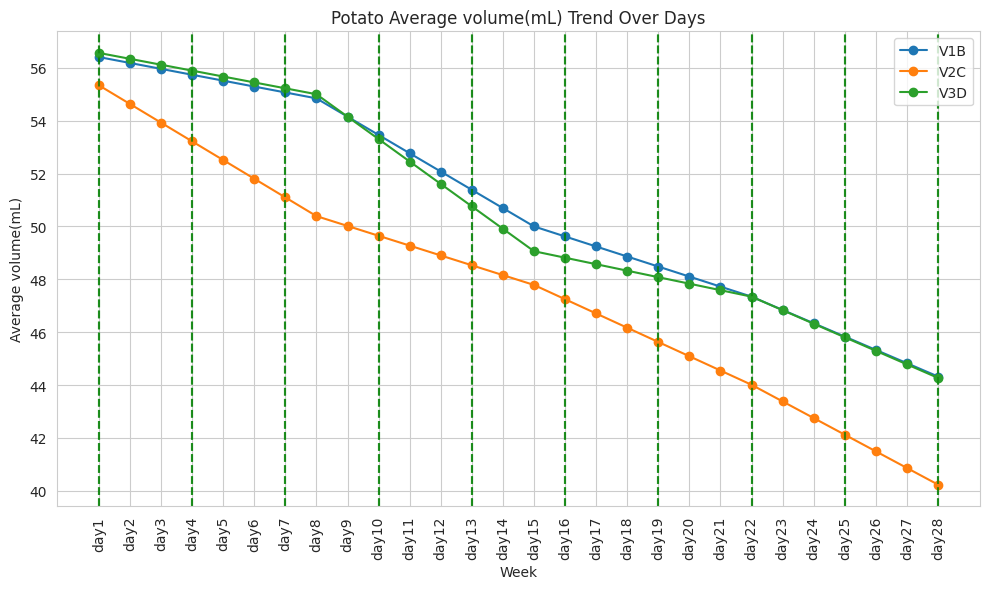

In [ ]:
value = 'volume(mL)'
start_date = '2023-07-31'

plt.figure(figsize=(10, 6))

plt.title(f"Potato Average {value} Trend Over Days")
for species in ['V1B', 'V2C', 'V3D']:
  overDays(species, value, start_date)

## Density plots

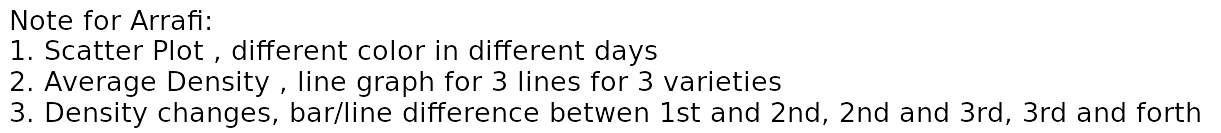

In [ ]:
df = pd.read_excel("/content/Density Analysis.xlsx", sheet_name='density')
df.head()

,name,density_day0,density_day3,density_day6,density_day9,density_day12,density_day15
0,V1B_Pot1,1221.600000,1237.942857,1254.285714,1260.827068,1267.368421,1332.695975
1,V1B_Pot2,1268.622222,1263.200000,1257.777778,1253.866667,1249.955556,1320.677778
2,V1B_Pot3,1180.114286,1226.457143,1272.800000,1317.066667,1361.333333,1415.648485
3,V1B_Pot4,1120.480000,1146.345263,1172.210526,1202.371930,1232.533333,1262.949020
4,V1B_Pot5,1069.226667,1102.613333,1136.000000,1286.836364,1437.672727,1428.363636


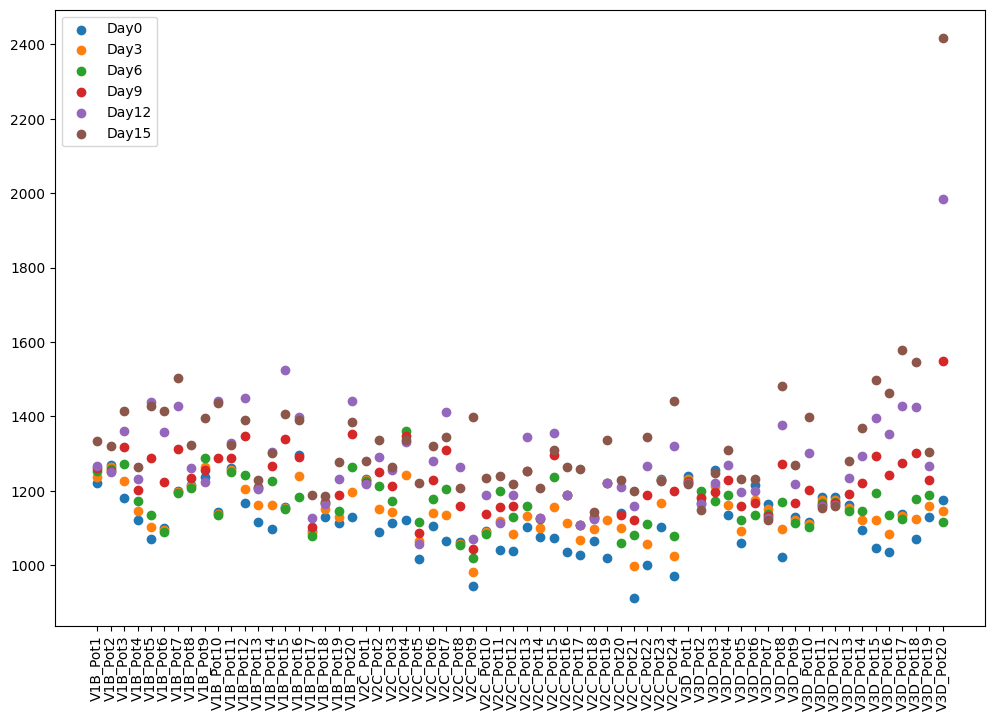

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df.name, df['density_day0'], label = 'Day0')
plt.scatter(df.name, df['density_day3'], label = 'Day3')
plt.scatter(df.name, df['density_day6'], label = 'Day6')
plt.scatter(df.name, df['density_day9'], label = 'Day9')
plt.scatter(df.name, df['density_day12'], label = 'Day12')
plt.scatter(df.name, df['density_day15'], label = 'Day15')
plt.legend()
plt.xticks(df.name, rotation=90)
plt.show()

In [ ]:
df = pd.read_excel("/content/Density Analysis.xlsx", sheet_name='density')
def changeName(row):
    row['species'] = row['name'][:3]
    return row
df = df.apply(changeName, axis=1)
df_grouped = df.groupby(['species'])
df.head()

,name,density_day0,density_day3,density_day6,density_day9,density_day12,density_day15,species
0,V1B_Pot1,1221.600000,1237.942857,1254.285714,1260.827068,1267.368421,1332.695975,V1B
1,V1B_Pot2,1268.622222,1263.200000,1257.777778,1253.866667,1249.955556,1320.677778,V1B
2,V1B_Pot3,1180.114286,1226.457143,1272.800000,1317.066667,1361.333333,1415.648485,V1B
3,V1B_Pot4,1120.480000,1146.345263,1172.210526,1202.371930,1232.533333,1262.949020,V1B
4,V1B_Pot5,1069.226667,1102.613333,1136.000000,1286.836364,1437.672727,1428.363636,V1B


In [ ]:
def overDays(species, value, start_date = '2023-07-31'):
    # Melt the DataFrame to transform weeks into a single "week" column and days into a "day" column

    df_melted = pd.melt(df_grouped.get_group(species), id_vars=["name"], value_vars=[value+"_day0", value+"_day3", value+"_day6", value+"_day9", value+"_day12", value+"_day15"],
                        var_name="week", value_name=value)

    # Add day information
    df_melted["day"] = df_melted["week"].str.extract("(\d+)").astype(int)

    # Calculate average weight for each day
    average_weight_per_day = df_melted.groupby("day")[value].mean()

    data = average_weight_per_day.to_frame().reset_index()
    # Create a new DataFrame with the desired format
    new_data = {
        'name': [species],
        value+'_week1': [data[value].iloc[0]],
        value+'_week2': [data[value].iloc[1]],
        value+'_week3': [data[value].iloc[2]]
    }

    data = pd.DataFrame(new_data)

    # Display the new DataFrame
    print(data)

    # Convert the week columns to a more usable format
    week_columns = data.columns[1:]

    import math
    def avgChange(df, week_columns):
        # Calculate the average change
        total_change = 0
        num_changes = 0

        for i in range(len(week_columns) - 1):
            if not pd.isnull(df.at[0, week_columns[i]]) and not pd.isnull(df.at[0, week_columns[i + 1]]):
                change = df.at[0, week_columns[i + 1]] - df.at[0, week_columns[i]]
                total_change += change
                num_changes += 1

        if num_changes > 0:
            average_change = total_change / num_changes
            # print("Average Change:", average_change)
        else:
            return math.inf
            print("No valid changes found.")

        return average_change


    # Create a new DataFrame for expanded data
    expanded_data = []

    # Define the date range for four weeks (starting on a Monday)
    date_range = pd.date_range(start=start_date, periods=21, freq='D')  # Adjust the start date accordingly

    for date in date_range:
        row = {'Date': date}
        week_number = (date - date_range[0]).days // 7 + 1  # Calculate week number
        if date.weekday() == 0:  # Monday
            weight_col = f'{value}_week{week_number}'
            row[value] = data.at[0, weight_col]
        else:
            row[value] = None
        expanded_data.append(row)

    # Create the expanded DataFrame
    expanded_df = pd.DataFrame(expanded_data)

    if species == 'V2C':
        expanded_df.iloc[-7,-1] = expanded_df.iloc[-14,-1] + avgChange(data, week_columns)

    expanded_df.iloc[-1,-1] = expanded_df.iloc[-7,-1] + avgChange(data, week_columns)
    expanded_df[value] = expanded_df[value].interpolate()
    expanded_df['days'] = ['day{}'.format(i + 1) for i in range(len(expanded_df))]
    # Display the expanded DataFrame
    # print(expanded_df)

    # Create a plot for the average weight trend
    plt.plot(expanded_df.days, expanded_df[value], marker='o', label=species, markevery=3)

    # Customize x-axis ticks to show different color ticks after 7 days
    for i, days in enumerate(expanded_df.days):
        if i % 3 == 0:  # Every 7 days
            plt.axvline(x=days, color='green', linestyle='--', alpha=0.5)

    plt.xlabel("Week")
    plt.ylabel("Average {}".format(value))
    plt.grid(True)
    plt.tight_layout()
    # plt.xticks(expanded_df.days, rotation=90)
    plt.xticks(range(0,21,3), ['day0', 'day3', 'day6', 'day9', 'day12', 'day15', 'day18'])
    plt.legend(loc='upper right')
    return None

  name  density_week1  density_week2  density_week3
0  V1B    1165.882904    1181.271455    1196.660005
  name  density_week1  density_week2  density_week3
0  V2C    1060.414608    1107.162233    1153.909858
  name  density_week1  density_week2  density_week3
0  V3D    1136.223253    1146.370814    1156.518375


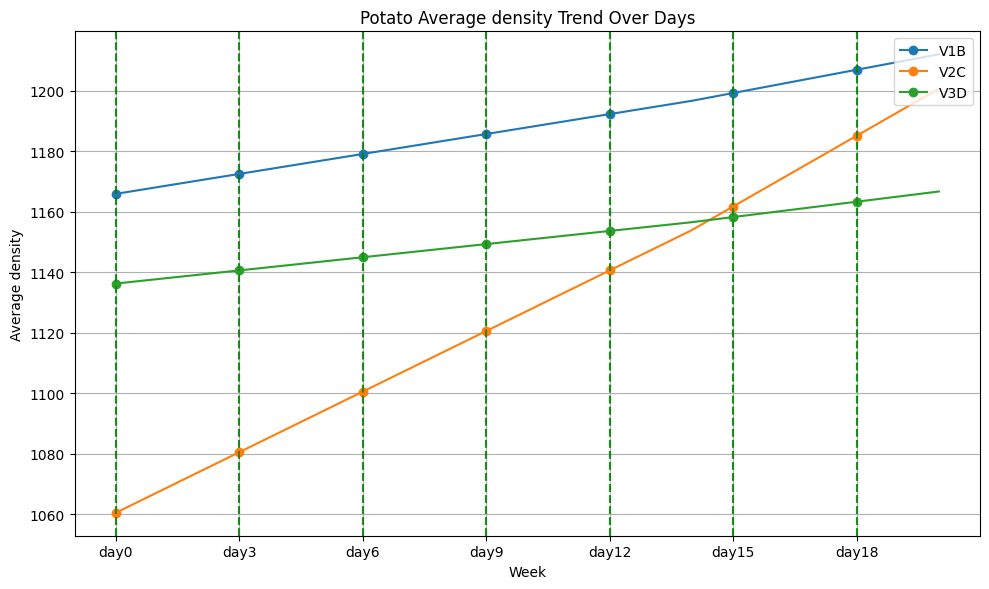

In [ ]:
value = 'density'
start_date = '2023-07-31'

plt.figure(figsize=(10, 6))

plt.title(f"Potato Average {value} Trend Over Days")
for species in ['V1B', 'V2C', 'V3D']:
    overDays(species, value, start_date)

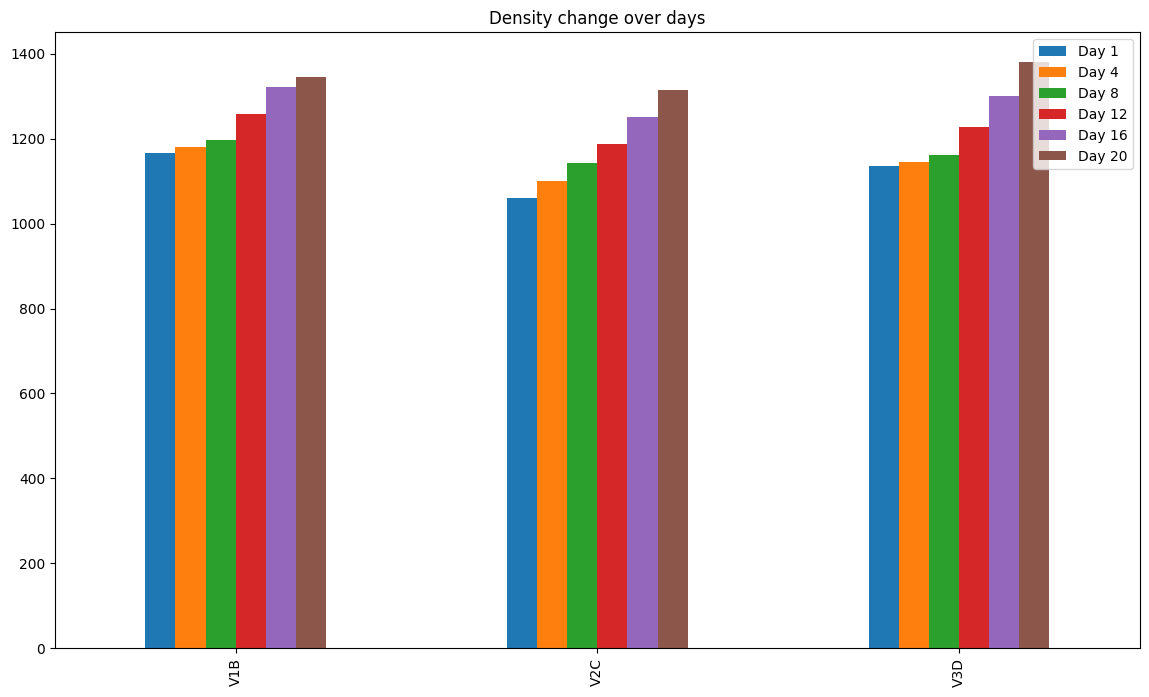

In [ ]:
df1 = pd.read_excel("/content/Density Analysis.xlsx", sheet_name='average_density')
df1.plot(kind = 'bar', title = 'Density change over days', figsize=(14, 8))
plt.xticks([0, 1, 2], df1['Variety'].values)
plt.show()

<Axes: xlabel='species', ylabel='density_day0'>

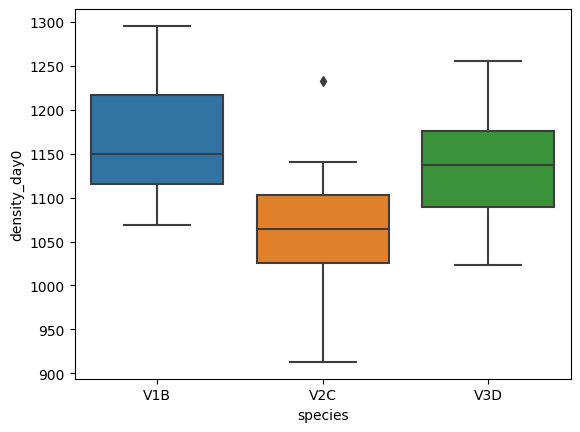

In [ ]:
sns.boxplot(x = 'species', y = 'density_day0', data = df)

<Axes: xlabel='species', ylabel='density_day3'>

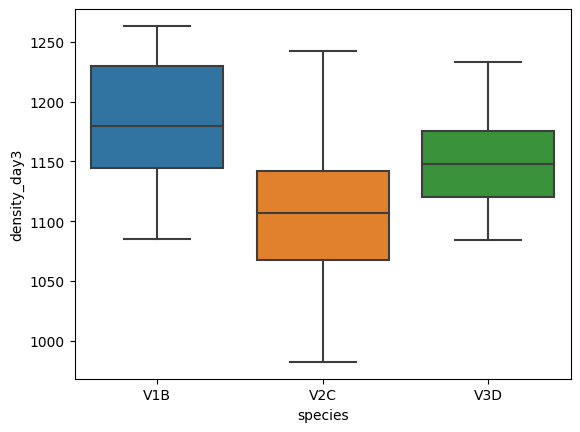

In [ ]:
sns.boxplot(x = 'species', y = 'density_day3', data = df)

<Axes: xlabel='species', ylabel='density_day6'>

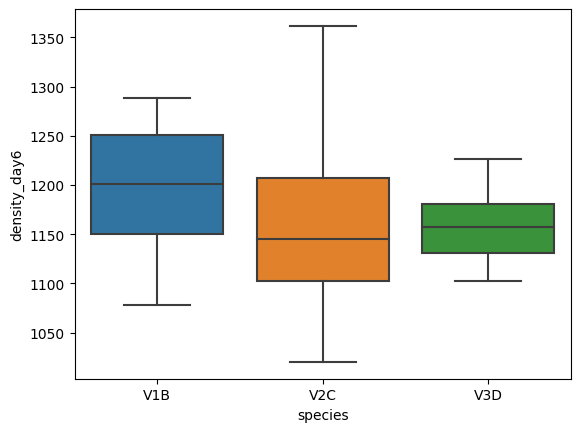

In [ ]:
sns.boxplot(x = 'species', y = 'density_day6', data = df)

<Axes: xlabel='species', ylabel='density_day9'>

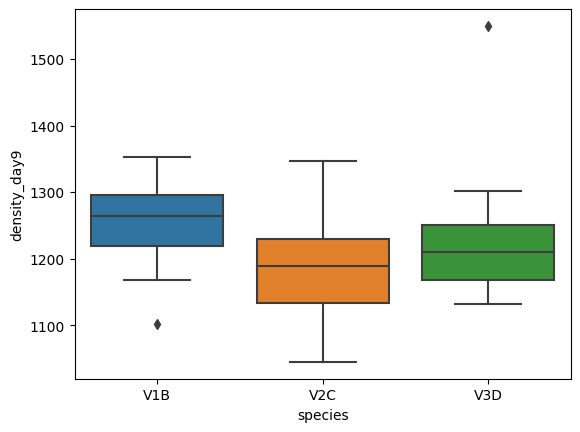

In [ ]:
sns.boxplot(x = 'species', y = 'density_day9', data = df)

<Axes: xlabel='species', ylabel='density_day12'>

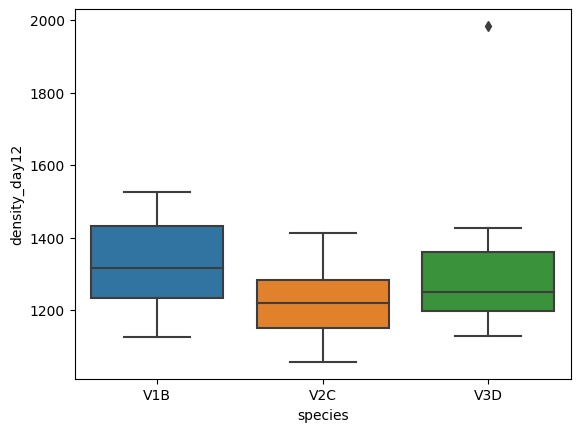

In [ ]:
sns.boxplot(x = 'species', y = 'density_day12', data = df)

<Axes: xlabel='species', ylabel='density_day15'>

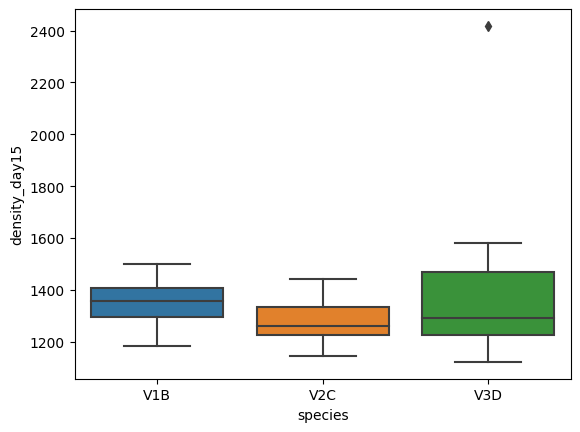

In [ ]:
sns.boxplot(x = 'species', y = 'density_day15', data = df)

## Moisture Content

  name  moisture_week1  moisture_week2  moisture_week3
0  V1B       79.166655       79.174092       78.931507
  name  moisture_week1  moisture_week2  moisture_week3
0  V2C       86.869846       85.018678       82.295987
  name  moisture_week1  moisture_week2  moisture_week3
0  V3D       84.365943       81.245692       80.089967


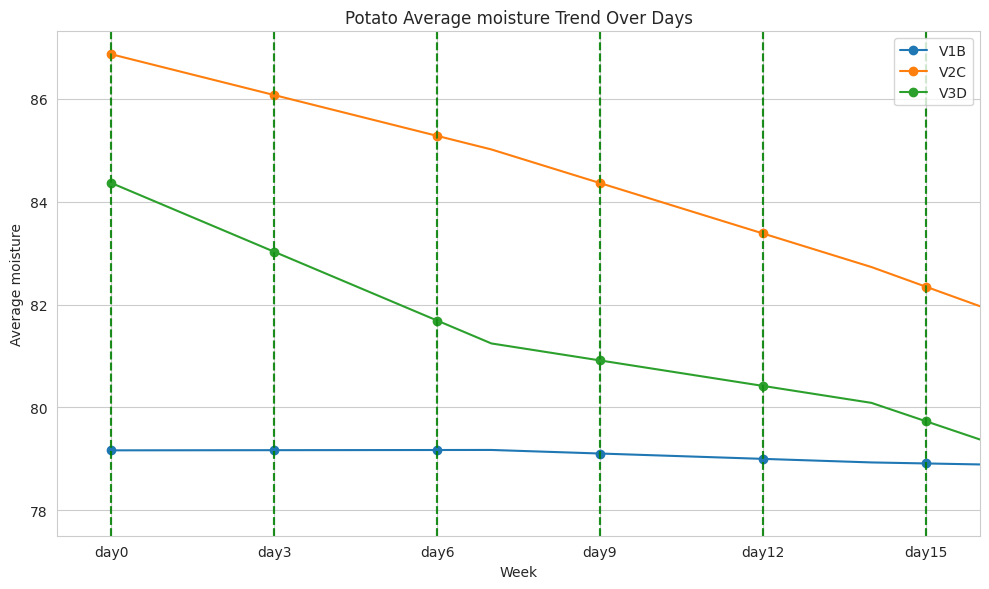

In [ ]:
df = pd.read_excel("/content/moisture_content.xlsx")
def changeName(row):
    row['species'] = row['name'][:3]
    return row
df = df.apply(changeName, axis=1)
df_grouped = df.groupby(['species'])
df.head()

value = 'moisture'
start_date = '2023-07-31'

plt.figure(figsize=(10, 6))

plt.title(f"Potato Average {value} Trend Over Days")
for species in ['V1B', 'V2C', 'V3D']:
    overDays(species, value, start_date)
    plt.xlim([-1, 16])

In [ ]:
def expandDFs(species, value, start_date = '2023-07-31'):
    # Melt the DataFrame to transform weeks into a single "week" column and days into a "day" column

    df_melted = pd.melt(df_grouped.get_group(species), id_vars=["name"], value_vars=[value+"_day0", value+"_day3", value+"_day6", value+"_day9", value+"_day12", value+"_day15"],
                        var_name="week", value_name=value)

    # Add day information
    df_melted["day"] = df_melted["week"].str.extract("(\d+)").astype(int)

    # Calculate average weight for each day
    average_weight_per_day = df_melted.groupby("day")[value].mean()

    data = average_weight_per_day.to_frame().reset_index()
    # Create a new DataFrame with the desired format
    new_data = {
        'name': [species],
        value+'_week1': [data[value].iloc[0]],
        value+'_week2': [data[value].iloc[1]],
        value+'_week3': [data[value].iloc[2]]
    }

    data = pd.DataFrame(new_data)

    # Display the new DataFrame
    print(data)

    # Convert the week columns to a more usable format
    week_columns = data.columns[1:]

    import math
    def avgChange(df, week_columns):
        # Calculate the average change
        total_change = 0
        num_changes = 0

        for i in range(len(week_columns) - 1):
            if not pd.isnull(df.at[0, week_columns[i]]) and not pd.isnull(df.at[0, week_columns[i + 1]]):
                change = df.at[0, week_columns[i + 1]] - df.at[0, week_columns[i]]
                total_change += change
                num_changes += 1

        if num_changes > 0:
            average_change = total_change / num_changes
            # print("Average Change:", average_change)
        else:
            return math.inf
            print("No valid changes found.")

        return average_change


    # Create a new DataFrame for expanded data
    expanded_data = []

    # Define the date range for four weeks (starting on a Monday)
    date_range = pd.date_range(start=start_date, periods=21, freq='D')  # Adjust the start date accordingly

    for date in date_range:
        row = {'Date': date}
        week_number = (date - date_range[0]).days // 7 + 1  # Calculate week number
        if date.weekday() == 0:  # Monday
            weight_col = f'{value}_week{week_number}'
            row[value] = data.at[0, weight_col]
        else:
            row[value] = None
        expanded_data.append(row)

    # Create the expanded DataFrame
    expanded_df = pd.DataFrame(expanded_data)

    if species == 'V2C':
        expanded_df.iloc[-7,-1] = expanded_df.iloc[-14,-1] + avgChange(data, week_columns)

    expanded_df.iloc[-1,-1] = expanded_df.iloc[-7,-1] + avgChange(data, week_columns)
    expanded_df[value] = expanded_df[value].interpolate()
    expanded_df['days'] = [species+'_day{}'.format(i + 1) for i in range(len(expanded_df))]
    # Display the expanded DataFrame
    # print(expanded_df)

    return expanded_df

value = ['density', 'moisture']
start_date = '2023-07-31'
dfs = []

for species in ['V1B', 'V2C', 'V3D']:
    df = pd.read_excel("/content/Density Analysis.xlsx")
    def changeName(row):
        row['species'] = row['name'][:3]
        return row
    df = df.apply(changeName, axis=1)
    df_grouped = df.groupby(['species'])
    denst_df = expandDFs(species, value[0], start_date)
    df = pd.read_excel("/content/moisture_content.xlsx")
    def changeName(row):
        row['species'] = row['name'][:3]
        return row
    df = df.apply(changeName, axis=1)
    df_grouped = df.groupby(['species'])
    moist_df = expandDFs(species, value[1], start_date)
    dfs.append(pd.merge(denst_df, moist_df, on='days')[['density', 'moisture', 'days']])

temp1 = pd.concat([dfs[0], dfs[1]], axis=0)
md = pd.concat([temp1, dfs[2]], axis=0)


  name  density_week1  density_week2  density_week3
0  V1B    1165.882904    1181.271455    1196.660005
  name  moisture_week1  moisture_week2  moisture_week3
0  V1B       79.166655       79.174092       78.931507
  name  density_week1  density_week2  density_week3
0  V2C    1060.414608    1107.162233    1153.909858
  name  moisture_week1  moisture_week2  moisture_week3
0  V2C       86.869846       85.018678       82.295987
  name  density_week1  density_week2  density_week3
0  V3D    1136.223253    1146.370814    1156.518375
  name  moisture_week1  moisture_week2  moisture_week3
0  V3D       84.365943       81.245692       80.089967


In [ ]:
def changeName(row):
    row['species'] = row['days'][:3]
    return row
md = md.apply(changeName, axis=1)
md.head()

,density,moisture,days,species
0,1165.882904,79.166655,V1B_day1,V1B
1,1168.081269,79.167718,V1B_day2,V1B
2,1170.279633,79.168780,V1B_day3,V1B
3,1172.477997,79.169842,V1B_day4,V1B
4,1174.676362,79.170905,V1B_day5,V1B


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(md['density'], md['moisture'], test_size = 0.33, random_state=42)
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train)
y_pred = model.predict(X_test.values.reshape(-1,1))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE: ", rmse)
print("R2: ", r2)

RMSE:  1.2092518095325924
R2:  0.6196502895839168


In [ ]:
md_grouped = md.groupby('species')
# md_grouped.get_group('V1B')

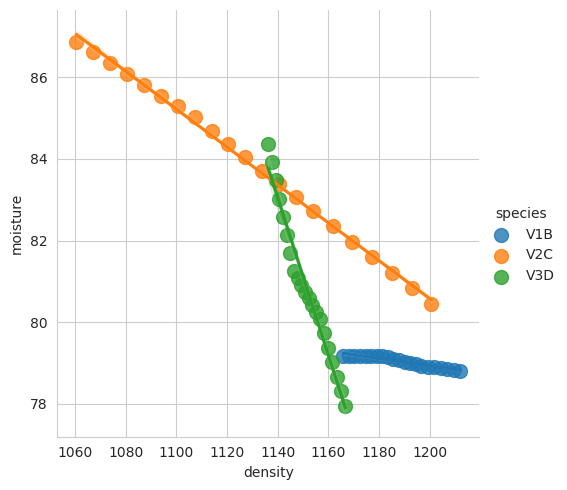

In [ ]:
import scipy as sp

sns.set_style('whitegrid')
g = sns.lmplot(x ='density', y ='moisture', data = md, hue='species',
           scatter_kws ={'s':100},
           )

def annotate(data, **kws):
    # get the hue group; there will be one
    g = md1.species.unique()[0]
    print(i)
    # get the y-position from the dict
    y = yg[g]

    X_train, X_test, y_train, y_test = train_test_split(md1['density'], md1['moisture'], test_size = 0.33, random_state=42)
    model = LinearRegression()
    model.fit(X_train.values.reshape(-1,1), y_train)
    y_pred = model.predict(X_test.values.reshape(-1,1))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    ax = plt.gca()
    ax.text(.9, .9, ' r^2={:.2f} \n rmse={:.2f}'.format(r2, rmse),
        transform=ax.transAxes)

yg = {'V1B': .9, 'V2C' : .8, 'V3D': .7}
# md_grouped = md.groupby('species')
# for i in ['V1B', 'V2C', 'V3D']:
#     md1 = md_grouped.get_group(i)
#     # md1 = md
#     _ = g.map_dataframe(annotate)

# _ = g.map_dataframe(annotate)
plt.show()

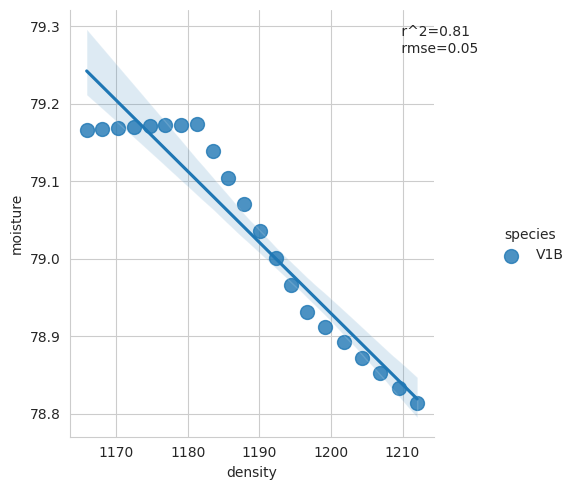

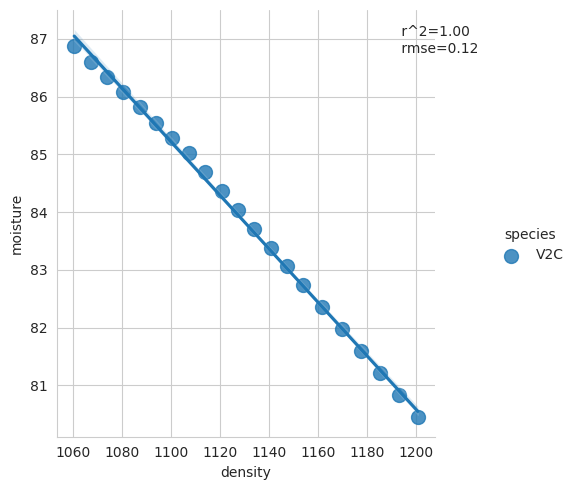

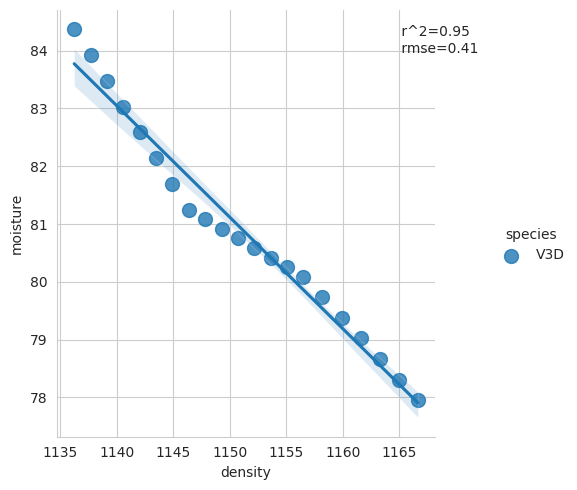

In [ ]:
color = ['blue', 'green', 'orange']
for i in ['V1B', 'V2C', 'V3D']:
    md = md_grouped.get_group(i)

    sns.set_style('whitegrid')
    g = sns.lmplot(x ='density', y ='moisture', data = md, hue ='species',
              scatter_kws ={'s':100},
              )

    def annotate(data, **kws):
        X_train, X_test, y_train, y_test = train_test_split(md['density'], md['moisture'], test_size = 0.33, random_state=42)
        model = LinearRegression()
        model.fit(X_train.values.reshape(-1,1), y_train)
        y_pred = model.predict(X_test.values.reshape(-1,1))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        # print("RMSE: ", rmse)
        # print("R2: ", r2)
        ax = plt.gca()
        ax.text(.9, .9, ' r^2={:.2f} \n rmse={:.2f}'.format(r2, rmse),
            transform=ax.transAxes)
        # ax.text(.05, .8, 'r^2={:.2f}, p={:.2g}'.format(r, p),
        #         transform=ax.transAxes)

    g.map_dataframe(annotate)
    plt.show()

## Porosity

In [ ]:
def porosity_overDays(species, value, start_date = '2023-07-31'):
    # Display the new DataFrame
    print(data)

    # Convert the week columns to a more usable format
    week_columns = data.columns[1:]

    import math
    def avgChange(df, week_columns):
        # Calculate the average change
        total_change = 0
        num_changes = 0

        for i in range(len(week_columns) - 1):
            if not pd.isnull(df.at[0, week_columns[i]]) and not pd.isnull(df.at[0, week_columns[i + 1]]):
                change = df.at[0, week_columns[i + 1]] - df.at[0, week_columns[i]]
                total_change += change
                num_changes += 1

        if num_changes > 0:
            average_change = total_change / num_changes
            # print("Average Change:", average_change)
        else:
            return math.inf
            print("No valid changes found.")

        return average_change


    # Create a new DataFrame for expanded data
    expanded_data = []

    # Define the date range for four weeks (starting on a Monday)
    date_range = pd.date_range(start=start_date, periods=21, freq='D')  # Adjust the start date accordingly

    for date in date_range:
        row = {'Date': date}
        week_number = (date - date_range[0]).days // 7 + 1  # Calculate week number
        if date.weekday() == 0:  # Monday
            weight_col = f'{value}_week{week_number}'
            row[value] = data.at[0, weight_col]
        else:
            row[value] = None
        expanded_data.append(row)

    # Create the expanded DataFrame
    expanded_df = pd.DataFrame(expanded_data)

    if species == 'V2C':
        expanded_df.iloc[-7,-1] = expanded_df.iloc[-14,-1] + avgChange(data, week_columns)

    expanded_df.iloc[-1,-1] = expanded_df.iloc[-7,-1] + avgChange(data, week_columns)
    expanded_df[value] = expanded_df[value].interpolate()
    expanded_df['days'] = ['day{}'.format(i + 1) for i in range(len(expanded_df))]
    # Display the expanded DataFrame
    # print(expanded_df)

    # Create a plot for the average weight trend
    plt.plot(expanded_df.days, expanded_df[value], marker='o', label=species, markevery=3)

    # Customize x-axis ticks to show different color ticks after 7 days
    for i, days in enumerate(expanded_df.days):
        if i % 3 == 0:  # Every 7 days
            plt.axvline(x=days, color='green', linestyle='--', alpha=0.5)

    plt.xlabel("Week")
    plt.ylabel("Average {}".format(value))
    plt.grid(True)
    plt.tight_layout()
    # plt.xticks(expanded_df.days, rotation=90)
    plt.xticks(range(0,21,3), ['day0', 'day3', 'day6', 'day9', 'day12', 'day15', 'day18'])
    plt.legend(loc='upper right')
    return None

  species  porosity_week1  porosity_week2  porosity_week3
0     V1B         0.17605         0.44074         0.48352
  species  porosity_week1  porosity_week2  porosity_week3
0     V2C        0.338938        0.503561        0.528356
  species  porosity_week1  porosity_week2  porosity_week3
0     V3D        0.299195        0.425041        0.503925


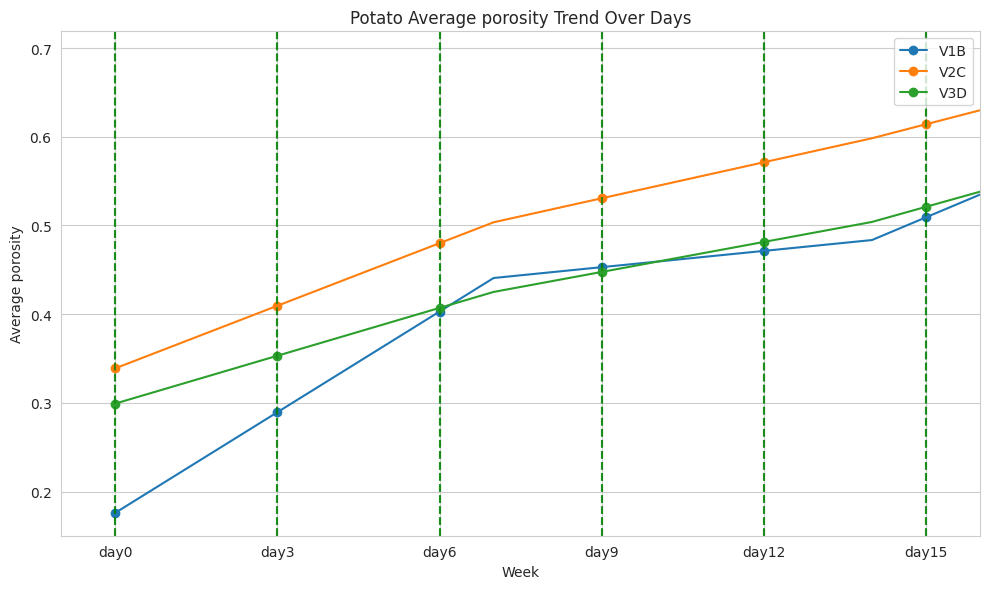

In [ ]:
df = pd.read_excel("/content/porosity.xlsx", sheet_name='Sheet2')
# df = df.drop('species', axis=1)
# def changeName(row):
#     row['species'] = row['name'][:3]
#     return row
# df = df.apply(changeName, axis=1)
df_grouped = df.groupby(['species'])
# df.head()


value = 'porosity'
start_date = '2023-07-31'

plt.figure(figsize=(10, 6))

plt.title(f"Potato Average {value} Trend Over Days")
for species in ['V1B', 'V2C', 'V3D']:
    data = df_grouped.get_group(species).reset_index().drop('index', axis=1)
    # print(data)
    porosity_overDays(species, value, start_date)
    plt.xlim([-1, 16])

In [ ]:
def expandDFs(species, value, start_date = '2023-07-31'):
    # Melt the DataFrame to transform weeks into a single "week" column and days into a "day" column

    df_melted = pd.melt(df_grouped.get_group(species), id_vars=["name"], value_vars=[value+"_day0", value+"_day3", value+"_day6", value+"_day9", value+"_day12", value+"_day15"],
                        var_name="week", value_name=value)

    # Add day information
    df_melted["day"] = df_melted["week"].str.extract("(\d+)").astype(int)

    # Calculate average weight for each day
    average_weight_per_day = df_melted.groupby("day")[value].mean()

    data = average_weight_per_day.to_frame().reset_index()
    # Create a new DataFrame with the desired format
    new_data = {
        'name': [species],
        value+'_week1': [data[value].iloc[0]],
        value+'_week2': [data[value].iloc[1]],
        value+'_week3': [data[value].iloc[2]]
    }

    data = pd.DataFrame(new_data)

    # Display the new DataFrame
    print(data)

    # Convert the week columns to a more usable format
    week_columns = data.columns[1:]

    import math
    def avgChange(df, week_columns):
        # Calculate the average change
        total_change = 0
        num_changes = 0

        for i in range(len(week_columns) - 1):
            if not pd.isnull(df.at[0, week_columns[i]]) and not pd.isnull(df.at[0, week_columns[i + 1]]):
                change = df.at[0, week_columns[i + 1]] - df.at[0, week_columns[i]]
                total_change += change
                num_changes += 1

        if num_changes > 0:
            average_change = total_change / num_changes
            # print("Average Change:", average_change)
        else:
            return math.inf
            print("No valid changes found.")

        return average_change


    # Create a new DataFrame for expanded data
    expanded_data = []

    # Define the date range for four weeks (starting on a Monday)
    date_range = pd.date_range(start=start_date, periods=21, freq='D')  # Adjust the start date accordingly

    for date in date_range:
        row = {'Date': date}
        week_number = (date - date_range[0]).days // 7 + 1  # Calculate week number
        if date.weekday() == 0:  # Monday
            weight_col = f'{value}_week{week_number}'
            row[value] = data.at[0, weight_col]
        else:
            row[value] = None
        expanded_data.append(row)

    # Create the expanded DataFrame
    expanded_df = pd.DataFrame(expanded_data)

    if species == 'V2C':
        expanded_df.iloc[-7,-1] = expanded_df.iloc[-14,-1] + avgChange(data, week_columns)

    expanded_df.iloc[-1,-1] = expanded_df.iloc[-7,-1] + avgChange(data, week_columns)
    expanded_df[value] = expanded_df[value].interpolate()
    expanded_df['days'] = [species+'_day{}'.format(i + 1) for i in range(len(expanded_df))]
    # Display the expanded DataFrame
    # print(expanded_df)

    return expanded_df

def porosity_overDays(species, value, start_date = '2023-07-31'):
    # Display the new DataFrame
    print(data)

    # Convert the week columns to a more usable format
    week_columns = data.columns[1:]

    import math
    def avgChange(df, week_columns):
        # Calculate the average change
        total_change = 0
        num_changes = 0

        for i in range(len(week_columns) - 1):
            if not pd.isnull(df.at[0, week_columns[i]]) and not pd.isnull(df.at[0, week_columns[i + 1]]):
                change = df.at[0, week_columns[i + 1]] - df.at[0, week_columns[i]]
                total_change += change
                num_changes += 1

        if num_changes > 0:
            average_change = total_change / num_changes
            # print("Average Change:", average_change)
        else:
            return math.inf
            print("No valid changes found.")

        return average_change


    # Create a new DataFrame for expanded data
    expanded_data = []

    # Define the date range for four weeks (starting on a Monday)
    date_range = pd.date_range(start=start_date, periods=21, freq='D')  # Adjust the start date accordingly

    for date in date_range:
        row = {'Date': date}
        week_number = (date - date_range[0]).days // 7 + 1  # Calculate week number
        if date.weekday() == 0:  # Monday
            weight_col = f'{value}_week{week_number}'
            row[value] = data.at[0, weight_col]
        else:
            row[value] = None
        expanded_data.append(row)

    # Create the expanded DataFrame
    expanded_df = pd.DataFrame(expanded_data)

    if species == 'V2C':
        expanded_df.iloc[-7,-1] = expanded_df.iloc[-14,-1] + avgChange(data, week_columns)

    expanded_df.iloc[-1,-1] = expanded_df.iloc[-7,-1] + avgChange(data, week_columns)
    expanded_df[value] = expanded_df[value].interpolate()
    expanded_df['days'] = [species+'_day{}'.format(i + 1) for i in range(len(expanded_df))]
    # Display the expanded DataFrame
    # print(expanded_df)

    # # Create a plot for the average weight trend
    # plt.plot(expanded_df.days, expanded_df[value], marker='o', label=species, markevery=3)

    # # Customize x-axis ticks to show different color ticks after 7 days
    # for i, days in enumerate(expanded_df.days):
    #     if i % 3 == 0:  # Every 7 days
    #         plt.axvline(x=days, color='green', linestyle='--', alpha=0.5)

    # plt.xlabel("Week")
    # plt.ylabel("Average {}".format(value))
    # plt.grid(True)
    # plt.tight_layout()
    # # plt.xticks(expanded_df.days, rotation=90)
    # plt.xticks(range(0,21,3), ['day0', 'day3', 'day6', 'day9', 'day12', 'day15', 'day18'])
    # plt.legend(loc='upper right')
    return expanded_df

value = ['density', 'porosity']
start_date = '2023-07-31'
dfs = []

for species in ['V1B', 'V2C', 'V3D']:
    df = pd.read_excel("/content/Density Analysis.xlsx")
    def changeName(row):
        row['species'] = row['name'][:3]
        return row
    df = df.apply(changeName, axis=1)
    df_grouped = df.groupby(['species'])
    denst_df = expandDFs(species, value[0], start_date)

    df = pd.read_excel("/content/porosity.xlsx", sheet_name='Sheet2')
    # def changeName(row):
    #     row['species'] = row['name'][:3]
    #     return row
    # df = df.apply(changeName, axis=1)
    df_grouped = df.groupby(['species'])
    data = df_grouped.get_group(species).reset_index().drop('index', axis=1)

    porse_df = porosity_overDays(species, value[1], start_date)
    dfs.append(pd.merge(denst_df, porse_df, on='days')[['density', 'porosity', 'days']])

temp1 = pd.concat([dfs[0], dfs[1]], axis=0)
md = pd.concat([temp1, dfs[2]], axis=0)

  name  density_week1  density_week2  density_week3
0  V1B    1165.882904    1181.271455    1196.660005
  species  porosity_week1  porosity_week2  porosity_week3
0     V1B         0.17605         0.44074         0.48352
  name  density_week1  density_week2  density_week3
0  V2C    1060.414608    1107.162233    1153.909858
  species  porosity_week1  porosity_week2  porosity_week3
0     V2C        0.338938        0.503561        0.528356
  name  density_week1  density_week2  density_week3
0  V3D    1136.223253    1146.370814    1156.518375
  species  porosity_week1  porosity_week2  porosity_week3
0     V3D        0.299195        0.425041        0.503925


In [ ]:
def changeName(row):
    row['species'] = row['days'][:3]
    return row
md = md.apply(changeName, axis=1)
md.head()

,density,porosity,days,species
0,1165.882904,0.176050,V1B_day1,V1B
1,1168.081269,0.213863,V1B_day2,V1B
2,1170.279633,0.251676,V1B_day3,V1B
3,1172.477997,0.289489,V1B_day4,V1B
4,1174.676362,0.327301,V1B_day5,V1B


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(md['density'], md['porosity'], test_size = 0.33, random_state=42)
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train)
y_pred = model.predict(X_test.values.reshape(-1,1))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE: ", rmse)
print("R2: ", r2)

RMSE:  0.11808330799527414
R2:  -0.03509203216650336


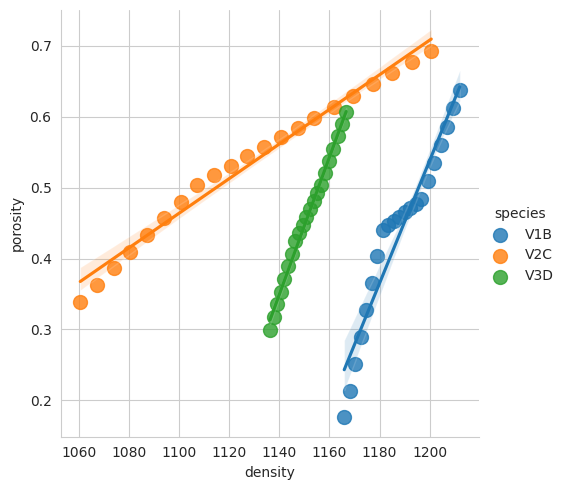

In [ ]:
import scipy as sp

sns.set_style('whitegrid')
g = sns.lmplot(x ='density', y ='porosity', data = md, hue='species',
           scatter_kws ={'s':100},
           )

def annotate(data, **kws):
    X_train, X_test, y_train, y_test = train_test_split(md['density'], md['porosity'], test_size = 0.33, random_state=42)
    model = LinearRegression()
    model.fit(X_train.values.reshape(-1,1), y_train)
    y_pred = model.predict(X_test.values.reshape(-1,1))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    ax = plt.gca()
    ax.text(1, .9, ' r^2={:.2f} \n rmse={:.2f}'.format(r2, rmse),
        transform=ax.transAxes)

# _ = g.map_dataframe(annotate)
plt.show()

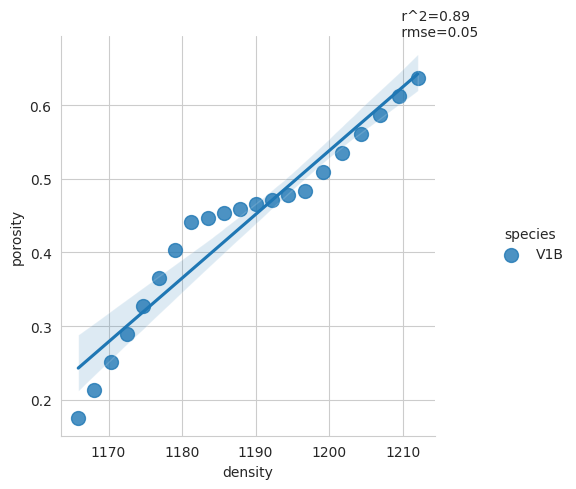

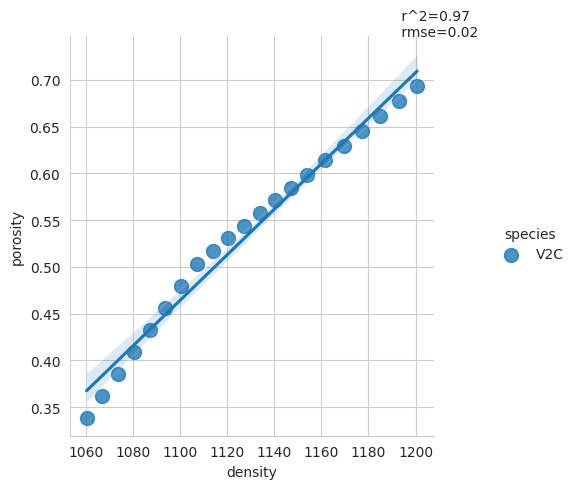

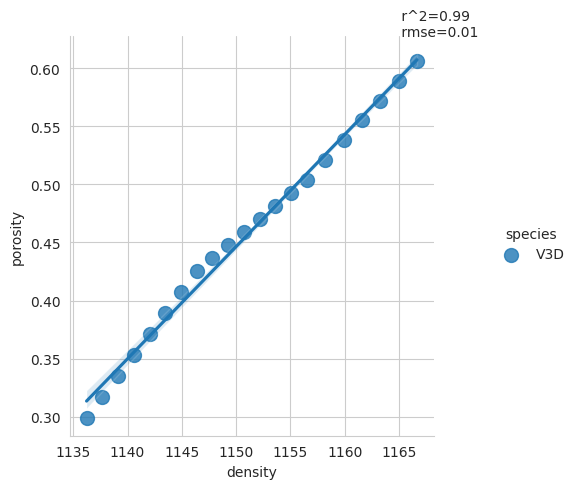

In [ ]:
color = ['blue', 'green', 'orange']
md_grouped = md.groupby('species')

for i in ['V1B', 'V2C', 'V3D']:
    md = md_grouped.get_group(i)

    sns.set_style('whitegrid')
    g = sns.lmplot(x ='density', y ='porosity', data = md, hue ='species',
              scatter_kws ={'s':100},
              )

    def annotate(data, **kws):
        X_train, X_test, y_train, y_test = train_test_split(md['density'], md['porosity'], test_size = 0.33, random_state=42)
        model = LinearRegression()
        model.fit(X_train.values.reshape(-1,1), y_train)
        y_pred = model.predict(X_test.values.reshape(-1,1))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        # print("RMSE: ", rmse)
        # print("R2: ", r2)
        ax = plt.gca()
        ax.text(.9, 1, ' r^2={:.2f} \n rmse={:.2f}'.format(r2, rmse),
            transform=ax.transAxes)
        # ax.text(.05, .8, 'r^2={:.2f}, p={:.2g}'.format(r, p),
        #         transform=ax.transAxes)

    g.map_dataframe(annotate)
    plt.show()